# Set-up

In [ ]:
library(ggplot2)
library(ggrepel)
library(dplyr)
library(glue)
library(ggh4x)

fig <- function(w,h){options(repr.plot.width=w, repr.plot.height=h)}

# Define the base directory based on the original structure
# This path should be adjusted if the project is moved
base_dir <- '/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7'

# Define input and output directories relative to the base directory
in.dir <- file.path(base_dir, "data_copy")
out.dir <- file.path(base_dir, "plots")

# Create the output directory if it doesn't exist, recursively
dir.create(out.dir, showWarnings = FALSE, recursive = TRUE)

Warning message in dir.create(out.dir):
“'/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/plots' already exists”


# **Part 1: Load the results**

In [7]:
nreps <- 10000

In [8]:
load_result <- function(res.file, in.dir, sign_level = 0.05, extra_rep=0){
    
    path.info <- (normalizePath(res.file) %>% 
                  gsub(pattern = normalizePath(in.dir), replacement = '', fixed=T) %>%
                  dirname %>% 
                  strsplit(split = '/', fixed = T))[[1]][-1] %>% 
        gsub(pattern = 'by_', replacement = '', fixed=T)
    
    n.reps <- (res.file %>% strsplit(split = '.', fixed =T))[[1]] %>% 
        grep(pattern = '_reps', fixed = T, value =T) %>% 
        gsub(pattern = '_reps', replacement = '') %>% 
        as.numeric
    
    res.df <- data.table::fread(res.file, data.table=F, nThread = parallel::detectCores()) %>%
        mutate(by_1 = path.info[1],
               value_1 = path.info[2],
               by_2 = path.info[3],
               value_2 = path.info[4],
               q.corr = ifelse(q == 0, 1/(n.reps+extra_rep), q),
               sign = q.corr <= sign_level)
    return(res.df)
}

load_results <- function(res.files, in.dir, sign_level = 0.05){
    return(
        lapply(res.files, load_result, in.dir = in.dir, sign_level = sign_level) %>% do.call(what = 'rbind')
    )
}
       


In [9]:
res.files <- list.files(in.dir, full.names = T, recursive = T) %>% 
    grep(value = T, pattern = 'results.csv', fixed=T) %>% 
    grep(value = T, pattern = 'Diseases_', fixed=T) %>% 
    grep(value = T, pattern = nreps, fixed=T) %>% sort %>% normalizePath

length(res.files)
res.files

[1] 29

[1] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Brain/by_Age/6.0/EWCE.Diseases_2024-11-28.10000_reps.results.csv"        
 [2] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Cortex/by_Age/10.0/EWCE.Diseases_2024-11-28.10000_reps.results.csv"      
 [3] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Cortex/by_Age/11.5/EWCE.Diseases_2024-11-28.10000_reps.results.csv"      
 [4] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Cortex/by_Age/12.0/EWCE.Diseases_2024-11-28.10000_reps.results.csv"      
 [5] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Cortex/by_Age/13.0/EWCE.Diseases_2024-11-28.10000_reps.results.csv"      
 [6] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Cortex/by_Age/14.0/EWCE.Diseases_2024-11-28.10000_reps.results.csv"      
 [7] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Cortex/by_Age/6.9/EWCE.Diseases_2024-11-28.10000_reps.results.csv"       
 [8] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Cortex/by_Age/8.0/EWCE.Diseases_2024-11-28.10000_reps.results.csv"       
 [9] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Cortex/by_Age/9.2/EWCE.Diseases_2024-11-28.10000_reps.results.csv"       
[10] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Cortex/by_Age/9.5/EWCE.Diseases_2024-11-28.10000_reps.results.csv"       
[11] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Forebrain/by_Age/10.0/EWCE.Diseases_2024-11-28.10000_reps.results.csv"   
[12] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Forebrain/by_Age/5.0/EWCE.Diseases_2024-11-28.10000_reps.results.csv"    
[13] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Forebrain/by_Age/5.5/EWCE.Diseases_2024-11-28.10000_reps.results.csv"    
[14] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Forebrain/by_Age/6.6/EWCE.Diseases_2024-11-28.10000_reps.results.csv"    
[15] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Forebrain/by_Age/7.5/EWCE.Diseases_2024-11-28.10000_reps.results.csv"    
[16] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Forebrain/by_Age/8.5/EWCE.Diseases_2024-11-28.10000_reps.results.csv"    
[17] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Forebrain/by_Age/9.2/EWCE.Diseases_2024-11-28.10000_reps.results.csv"    
[18] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Head/by_Age/5.0/EWCE.Diseases_2024-11-28.10000_reps.results.csv"         
[19] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Hippocampus/by_Age/12.0/EWCE.Diseases_2024-11-28.10000_reps.results.csv" 
[20] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Hippocampus/by_Age/14.0/EWCE.Diseases_2024-11-28.10000_reps.results.csv" 
[21] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Striatum/by_Age/14.0/EWCE.Diseases_2024-11-28.10000_reps.results.csv"    
[22] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Striatum/by_Age/6.9/EWCE.Diseases_2024-11-28.10000_reps.results.csv"     
[23] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Subcortex/by_Age/11.5/EWCE.Diseases_2024-11-28.10000_reps.results.csv"   
[24] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Subcortex/by_Age/12.0/EWCE.Diseases_2024-11-28.10000_reps.results.csv"   
[25] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Subcortex/by_Age/13.0/EWCE.Diseases_2024-11-28.10000_reps.results.csv"   
[26] "/users/genomics/xoel/Review_CD/2.ewce_linnarson.v7/data_copy/by_Subregion/Subcortex/by_Age/8.0/EWCE.Diseases_2024-11-28.10000_reps.results.csv"  

In [10]:
res.df <- load_results(res.files, in.dir)

In [11]:
unique(res.df$value_1)

[1] "Brain"         "Cortex"        "Forebrain"     "Head"         
[5] "Hippocampus"   "Striatum"      "Subcortex"     "Telencephalon"

# **Part 2: Load list metadata**

In [ ]:
# Define path to metadata file relative to the parent of base_dir
# Assumes '1.exp_linnarson' is a sibling directory to '2.ewce_linnarson.v7'
disease_info_path <- file.path(dirname(base_dir), "1.exp_linnarson", "DiseaseInfo.csv") 

dis.info <- read.csv(disease_info_path, row.names=1)[,-c(1:3)] %>% mutate(
    DiseaseLabel = factor(DiseaseLabel, levels=unique(DiseaseLabel)),
    DiseaseGroup = factor(DiseaseGroup, levels=unique(DiseaseGroup)),
    Dataset = NULL
)

In [14]:
exclude <- unique(res.df$list)[!unique(res.df$list) %in%dis.info$Disease]
res.df <- subset(res.df, !list%in%exclude)
print(glue('Excluded: {exclude}'))

Excluded: IQ_2018


In [15]:
# update info in results
res.df <- merge(res.df, dis.info, by.x='list', by.y = 'Disease', all.x = T, all.y = F)
res.df

list      CellType annotLevel p      fold_change sd_from_mean q         
1    AD_2019   ExNeuBl  1          0.0981 1.0660021    1.3136324   0.6312000 
2    AD_2019   GlioBl   1          0.7339 0.9620302   -0.6365450   0.8173000 
3    AD_2019   RGC      1          0.6959 0.9767624   -0.5324141   0.8173000 
4    AD_2019   ExNeuIPC 1          1.0000 0.8072752   -3.3344000   1.0000000 
5    AD_2019   ExNeu    1          1.0000 0.8212423   -3.4185263   1.0000000 
6    AD_2019   ExNeu    1          0.2888 1.0275777    0.5336125   0.6681333 
7    AD_2019   GlioBl   1          0.9999 0.7711766   -3.5348178   1.0000000 
8    AD_2019   Eryt     1          0.0200 1.5548682    2.3496197   0.1000000 
9    AD_2019   ExNeuIPC 1          1.0000 0.8016095   -3.8235446   1.0000000 
10   AD_2019   GlioBl   1          0.9735 0.8936196   -1.8446606   0.9948000 
11   AD_2019   InNeu    1          0.3833 1.0238039    0.2791481   0.7666000 
12   AD_2019   ExNeuIPC 1          0.8173 0.9538246   -0.8925136   0.8173000 
13   AD_2019   Imm      1          0.0000 1.7566832    6.8604352   0.0000000 
14   AD_2019   GlioBl   1          0.9985 0.8394139   -2.9070636   1.0000000 
15   AD_2019   RGC      1          0.9581 0.9245837   -1.6814008   1.0000000 
16   AD_2019   InNeu    1          1.0000 0.7716039   -3.9355524   1.0000000 
17   AD_2019   GlioBl   1          0.1578 1.0618250    0.9852525   0.6312000 
18   AD_2019   Fibr     1          0.0084 1.1828132    2.5904216   0.0460000 
19   AD_2019   GlioBl   1          0.2243 1.0344179    0.7558355   0.4486000 
20   AD_2019   Imm      1          0.0000 2.2157227    9.5023801   0.0000000 
21   AD_2019   Imm      1          0.0000 1.9906322    8.6892174   0.0000000 
22   AD_2019   Pery     1          0.7636 0.9232379   -0.7371276   1.0000000 
23   AD_2019   ExNeu    1          0.9792 0.8657850   -1.8839271   1.0000000 
24   AD_2019   InNeu    1          0.9887 0.8463188   -2.0801115   1.0000000 
25   AD_2019   ExNeuBl  1          0.9979 0.8370202   -2.6316119   1.0000000 
26   AD_2019   Imm      1          0.0000 1.7380095    6.0649478   0.0000000 
27   AD_2019   ExNeuBl  1          0.8014 0.9546328   -0.8637545   1.0000000 
28   AD_2019   Eryt     1          0.0276 1.9477193    2.2547211   0.2208000 
29   AD_2019   InNeuBl  1          0.3785 1.0206422    0.2797164   0.6681333 
30   AD_2019   ExNeuBl  1          0.5470 0.9914296   -0.1585984   0.7658000 
⋮    ⋮         ⋮        ⋮          ⋮      ⋮           ⋮            ⋮         
5323 SFAR_Synd ExNeuBl  1          0.0088 1.1334137    2.4508887   0.03080000
5324 SFAR_Synd ExNeuBl  1          0.0202 1.0969536    2.1260626   0.04713333
5325 SFAR_Synd GlioBl   1          0.9848 0.8544548   -2.0857700   1.00000000
5326 SFAR_Synd RGC      1          0.9897 0.8912557   -2.2769291   0.99330000
5327 SFAR_Synd ExNeuBl  1          0.0540 1.0785049    1.6388579   0.16200000
5328 SFAR_Synd InNeu    1          0.0000 1.3078355    4.4420268   0.00000000
5329 SFAR_Synd ExNeuIPC 1          0.9052 0.9300289   -1.2756730   1.00000000
5330 SFAR_Synd InNeu    1          0.0872 1.0736052    1.3693783   0.20346667
5331 SFAR_Synd InNeu    1          0.0028 1.1524805    2.9702957   0.00980000
5332 SFAR_Synd ExNeu    1          0.0030 1.1574020    2.8911745   0.02100000
5333 SFAR_Synd RGC      1          1.0000 0.8361116   -3.3957415   1.00000000
5334 SFAR_Synd Plac     1          0.0001 1.2118402    3.8951437   0.00030000
5335 SFAR_Synd GlioBl   1          0.9979 0.8507403   -2.6956573   1.00000000
5336 SFAR_Synd InNeuIPC 1          0.8375 0.9494964   -0.9969044   1.00000000
5337 SFAR_Synd InNeu    1          0.0050 1.2127198    2.7630383   0.03080000
5338 SFAR_Synd Fibr     1          0.9964 0.8702056   -2.6185964   0.99640000
5339 SFAR_Synd ExNeu    1          0.0000 1.2271860    4.2960706   0.00000000
5340 SFAR_Synd ExNeu    1          0.0247 1.0964376    2.0213372   0.14820000
5341 SFAR_Synd ExNeu    1          0.0000 1.3633498    5.3472199   0.00000000
5342 SFAR_Synd RGC      1  

# **Part 3: Palettes and factors**

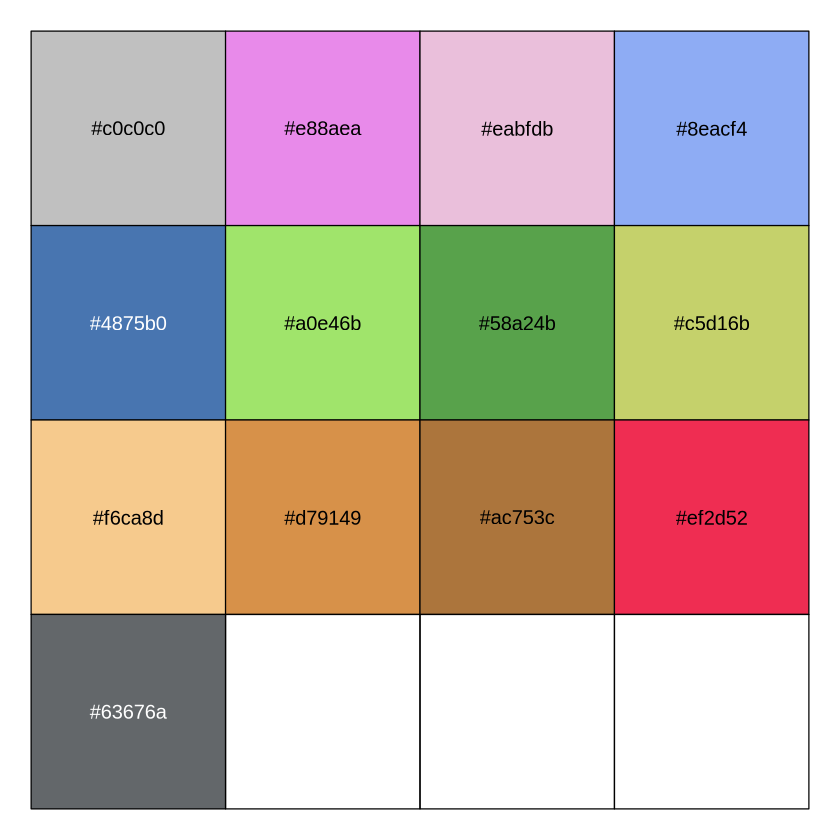

In [16]:
colors.monkey <- c(
    'PCs+EarlySubt+Mesen' = '#c0c0c0',
    'Dorsal NSC' = '#e88aea',
    'GE NSC' = '#eabfdb',
    'enIPC' = '#8eacf4',
    'ExcNeu' = '#4875b0',
    'inIPC' = '#a0e46b',
    'InhNeu' = '#58a24b',
    'CR' = '#c5d16b',
    'gIPC+aIPC+oIPC' = '#f6ca8d',
    'Astro' = '#d79149',
    'OPC-Oligo' = '#ac753c',
    'Imm' = '#ef2d52',
    'RB+Vas' = '#63676a'
)
scales::show_col(colors.monkey)

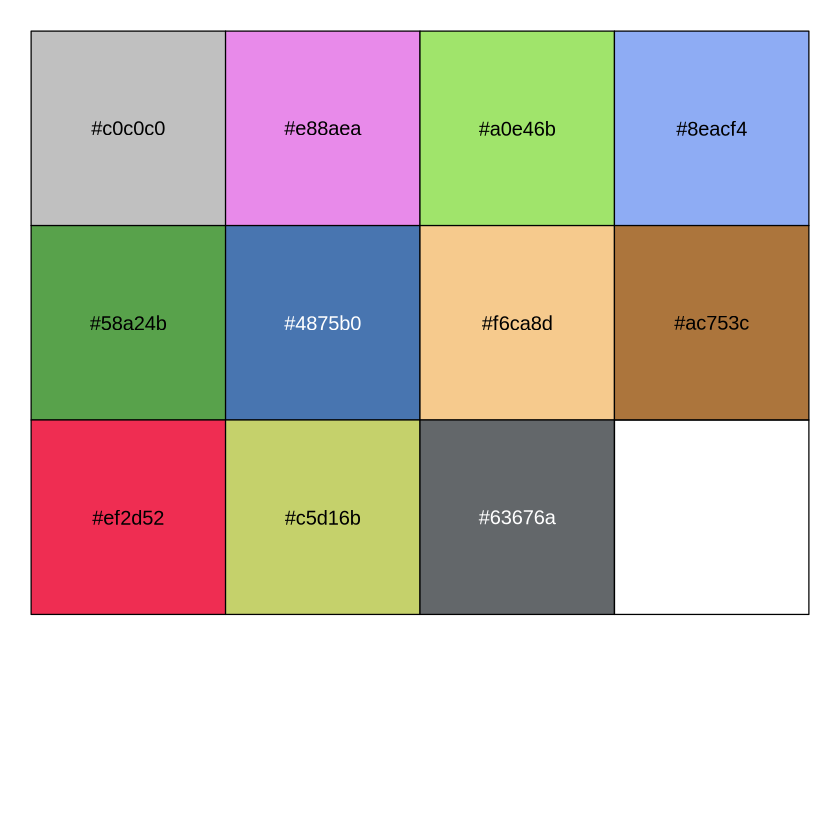

In [17]:
cts <- c(
    'Plac',
    'RGC',
    'InNeuIPC', 
    'ExNeuIPC', 
    'InNeuBl',
    'ExNeuBl',
    'InNeu', 
    'ExNeu',
    'GlioBl',
    'OPC',
    'COPs',
    'Schwann',
    'Imm',
    'Fibr',
    'Pery',
    'Endo',
    'Eryt',
    'VSMC'
)


cts.labels <- c(
    'Plac' = 'Placodes + NeuralCrest',
    'RGC' = 'RGC',
    'InNeuIPC' = 'inIPC', 
    'ExNeuIPC' = 'enIPC', 
    'InNeuBl' = 'InhNeuroblast + InhNeu',
    'ExNeuBl' = 'ExcNeuroblast + ExcNeu',
    'InNeu' = 'InhNeuroblast + InhNeu', 
    'ExNeu' = 'ExcNeuroblast + ExcNeu',
    'GlioBl' = 'Glioblast',
    'OPC' = 'OPC + COPs',
    'COPs' = 'OPC + COPs',
    'Schwann' = 'Placodes + NeuralCrest',
    'Imm' = 'Immune',
    'Fibr' = 'Peri + Endo + Fibroblast',
    'Pery' = 'Peri + Endo + Fibroblast',
    'Endo' = 'Peri + Endo + Fibroblast',
    'Eryt' = 'Erytr + VSMC',
    'VSMC' = 'Erytr + VSMC'
)


cts.pal <- c(
    'Placodes + NeuralCrest' = unname(colors.monkey['PCs+EarlySubt+Mesen']),
    'RGC' = unname(colors.monkey['Dorsal NSC']),
    'inIPC' = unname(colors.monkey['inIPC']),
    'enIPC' = unname(colors.monkey['enIPC']),
    'InhNeuroblast + InhNeu' = unname(colors.monkey['InhNeu']),
    'ExcNeuroblast + ExcNeu' = unname(colors.monkey['ExcNeu']),
    'Glioblast' = unname(colors.monkey['gIPC+aIPC+oIPC']),
    'OPC + COPs' = unname(colors.monkey['OPC-Oligo']),
    'Immune' = unname(colors.monkey['Imm']),
    'Peri + Endo + Fibroblast' = unname(colors.monkey['CR']),
    'Erytr + VSMC' = unname(colors.monkey['RB+Vas'])
)

scales::show_col(cts.pal)

In [18]:
subregions <- c('Head','Brain','Striatum','Hippocampus','Forebrain','Subcortex','Cortex','Telencephalon')
subregions.pal <- (viridis::turbo(n= length(subregions)+2)[-1] %>% rev)[-1] %>% setNames(nm=subregions)

In [19]:
# get levels for ages
ages <- unique(res.df$value_2)[unique(res.df$value_2) %>% as.numeric %>% order]
ages.pal <- (viridis::turbo(n = length(ages)+2)[-1] %>% rev)[-1] %>% setNames(nm = ages)

In [20]:
ages

[1] "5.0"  "5.5"  "6.0"  "6.6"  "6.7"  "6.9"  "7.5"  "8.0"  "8.5"  "9.2" 
[11] "9.5"  "10.0" "11.5" "12.0" "13.0" "14.0"

# **Part 4: Process results**

In [21]:
if (!all(unique(res.df$CellType) %in% names(cts.labels))){stop('CT')}
if (!all(unique(res.df$value_1) %in% subregions)){stop('V1')}
if (!all(unique(res.df$value_2) %in% ages)){stop('V2')}

res.df %>% mutate(
    CellType = factor(as.character(CellType), levels=names(cts.labels)),
    CellTypeGroup = plyr::mapvalues(CellType, from = names(cts.labels), to = cts.labels),
    CellTypeGroup = factor(CellTypeGroup, levels = names(cts.pal)),
    Subregion = factor(value_1, levels = subregions),
    Age = factor(value_2, levels = names(ages.pal))
) -> res.df

# **Part 5: Plots**

## **_`M A N H A T T A N`_**

In [ ]:
Manhattan <- function(results, 
                      list.var = 'list', q.var = 'q.corr', 
                      significant.var = 'sign', color.var = 'CellType',
                      shape.var = NULL, shapes = 15:20,
                      q.line.y = 0.05, q.line.color = 'red',
                      alpha = 0.7, jitter = 0.2,
                      list.facet.var = NULL, palette = NULL,
                      row.facet.var = NULL,
                      size.values = c(1,3.5){

    results <- results %>% mutate_if(is.factor, droplevels)
    

    if (!is.null(shape.var)){
        if (length(shapes) < length(unique(results[, shape.var]))){
            stop('Provide more shapes :)')
        }
    }
    ggplot(results, 
           aes_string(x=list.var, 
                      y= glue('-log10({q.var})'),
                      shape = shape.var, 
                      size= significant.var,
                      color=color.var) ) +
    theme_light() +
    ggpubr::labs_pubr() +
    scale_shape_manual(values = shapes) + 
    scale_y_continuous(expand = expansion(mult=c(0,0.05))) +
    labs(x = list.var, color=color.var, size = 'Significant\nenrichment', y = '-log10(q-value)') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust=0.5), 
          panel.grid.minor = element_blank(),
          panel.grid.major.y = element_blank(),
          strip.text = element_text(color = 'black', angle=0),
          strip.background = element_rect(fill='#DDDDDD', color = 'transparent'),
          panel.spacing.y = unit(1, 'mm'),
          panel.spacing.x = unit(3, 'mm'),
          panel.border = element_rect(fill='transparent', color = 'black', linewidth = 1)) -> p

    if(!is.null(q.line.y)){
        p <- p + geom_hline(yintercept = -log10(q.line.y), color=q.line.color)
    }
    
    p <- p + geom_jitter(height = 0, width = jitter, alpha = alpha)

    if(!all(is.null(list.facet.var), is.null(row.facet.var))){
        
        p$data$facet.list <- if(is.null(list.facet.var)){''}else{p$data[,list.facet.var]}
        p$data$facet.row <- if(is.null(row.facet.var)){''}else{p$data[,row.facet.var]}
        
        p <- p + facet_grid(rows = vars(facet.row), 
                            cols = vars(facet.list), 
                            scales = 'free_x', space='free_x', switch = 'y')
    }


    if(!is.null(palette)){
        p <- p + scale_color_manual(values=palette)
    }
    if(!is.null(size.values)){
        p <- p + scale_size_manual(values=size.values)
    }

    return(p)
}

Manhattans <- function(results, split.var, ...){
    return(
        split(results, droplevels(results[,split.var])) %>%
        lapply(function(x){
            p <-Manhattan(results = x, ...)
            if (!is.null(p)){
                return(p+ ggtitle(glue('{split.var}: {x[,split.var] %>% unique}')))}
    })
)}

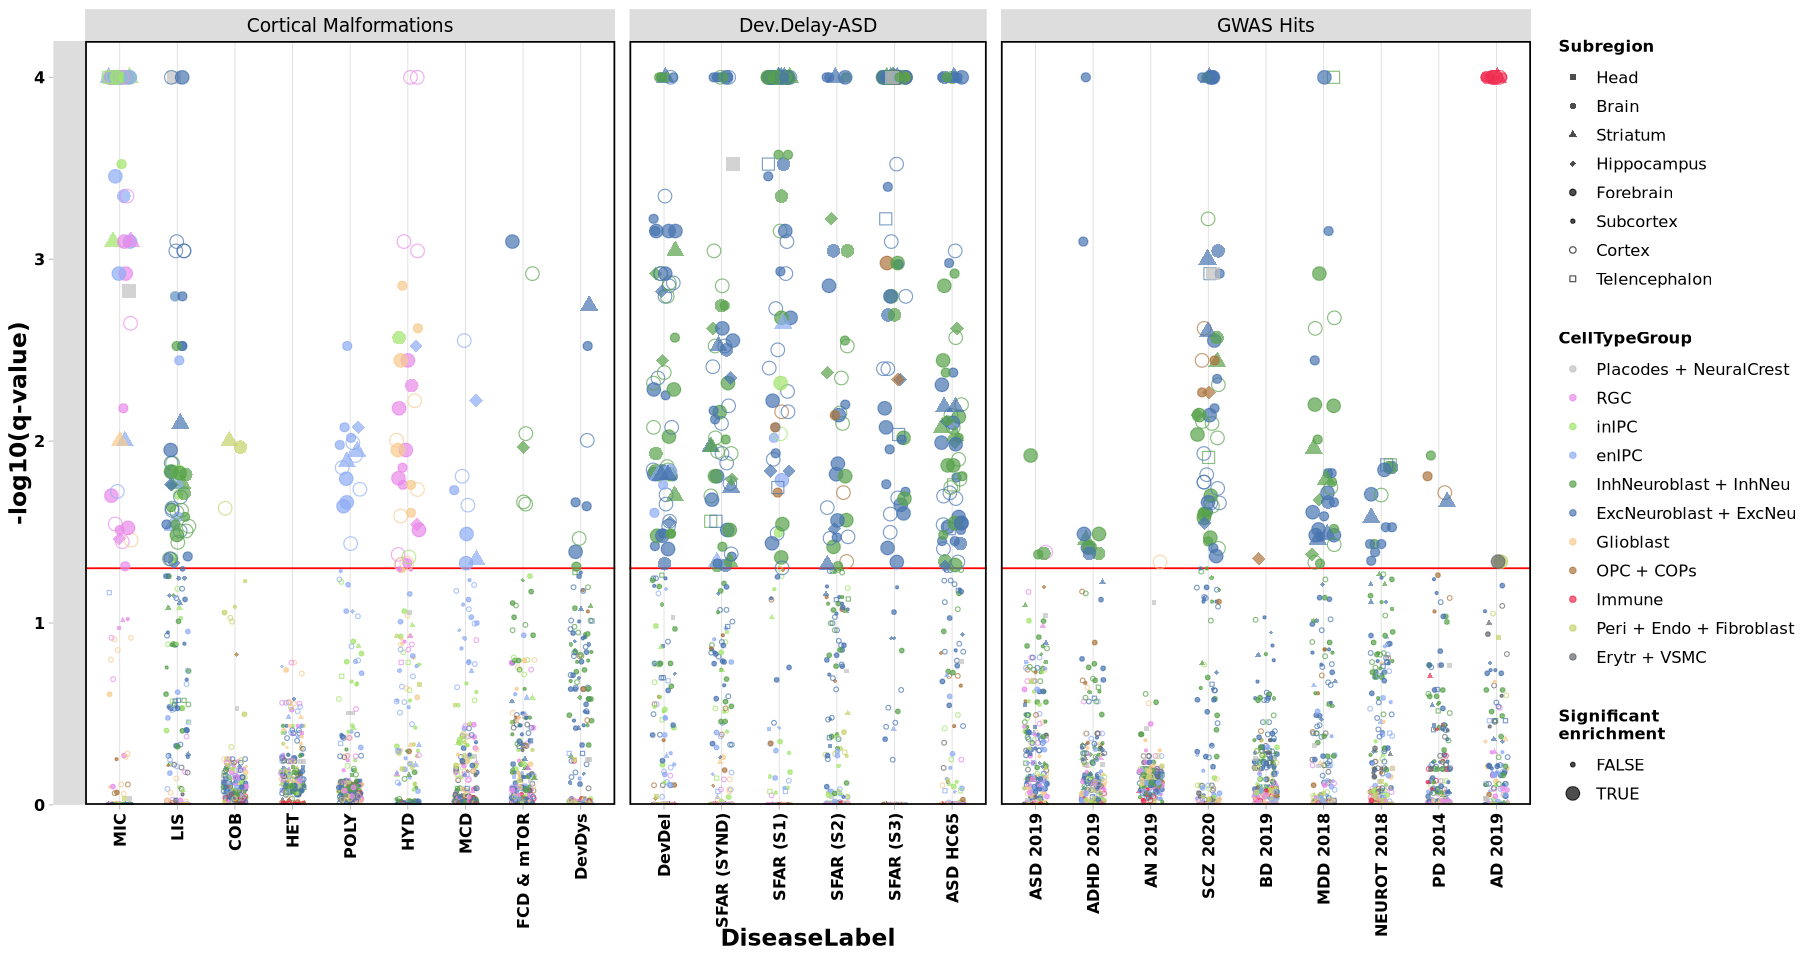

In [65]:
fig(15,8)
Manhattan(res.df, 
           list.var = 'DiseaseLabel', list.facet.var = 'DiseaseGroup', 
           color.var = 'CellTypeGroup', palette = cts.pal, shape.var = 'Subregion', shapes = 15:22
         )

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


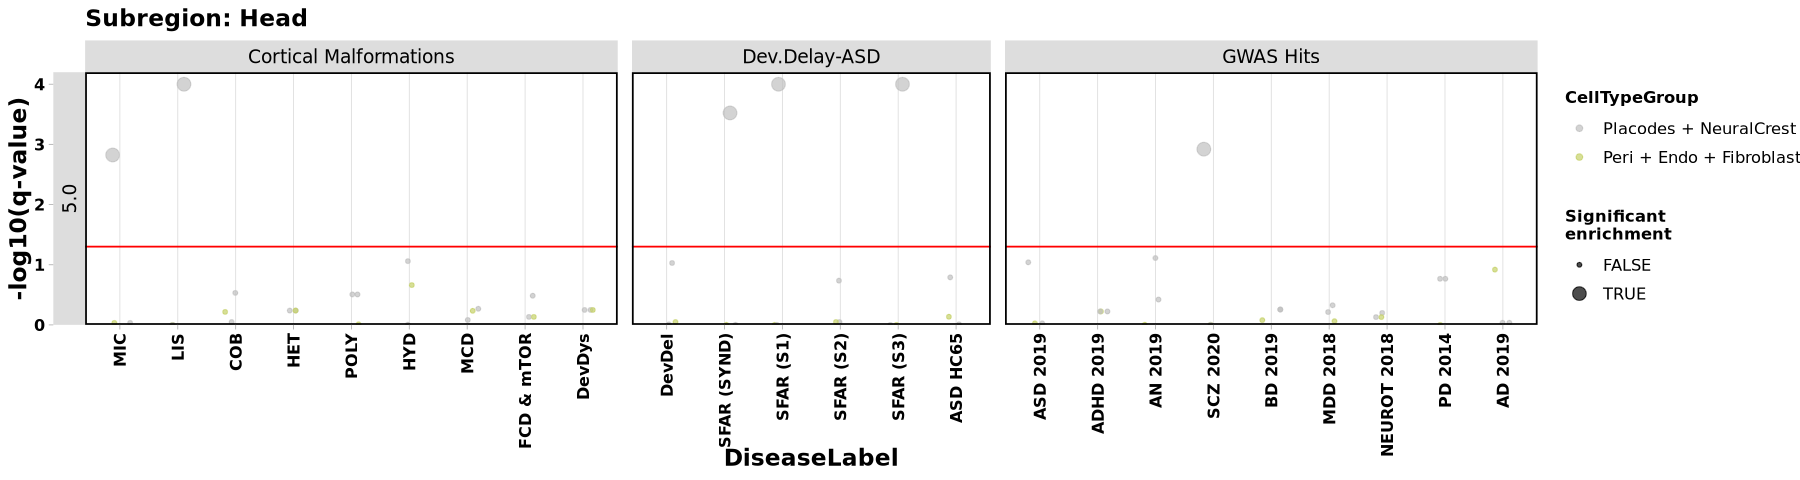

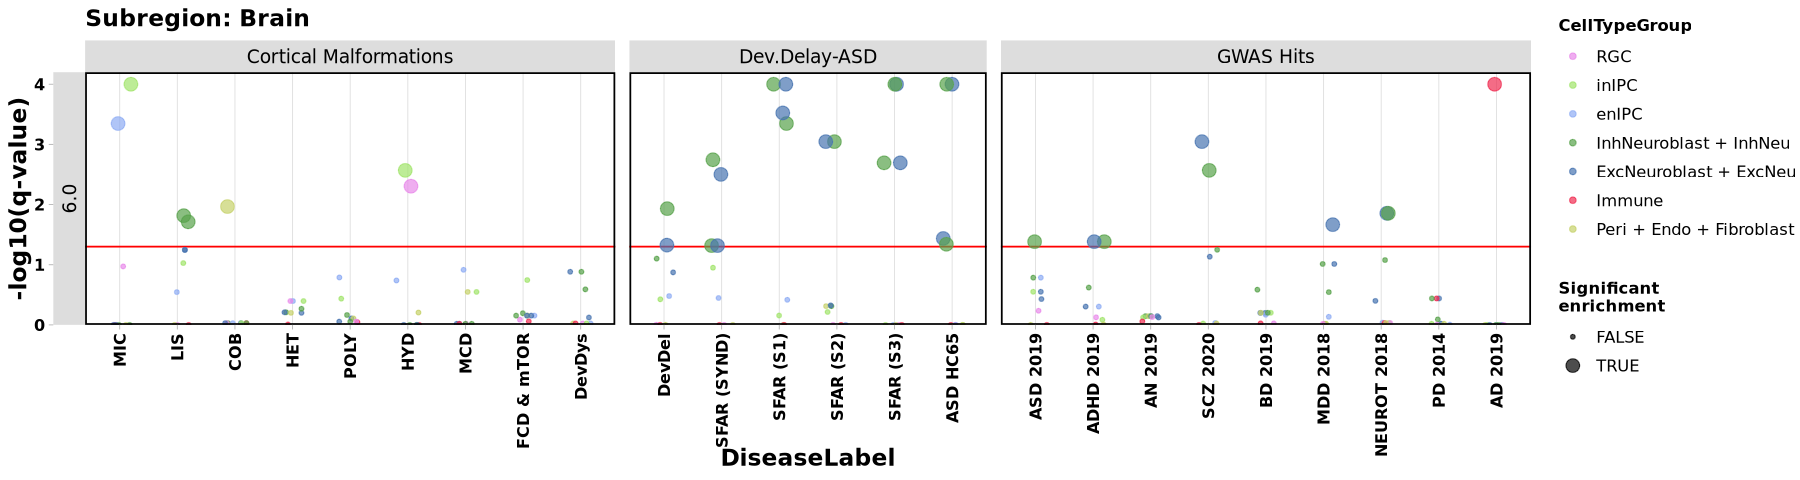

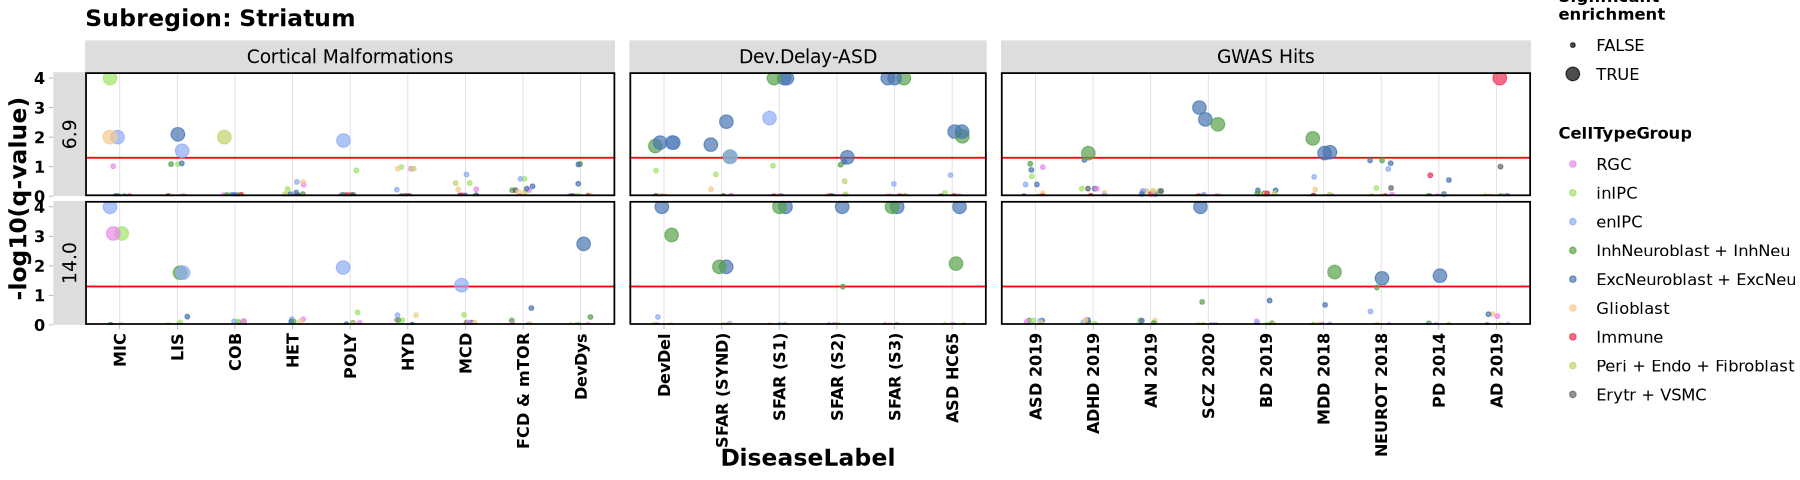

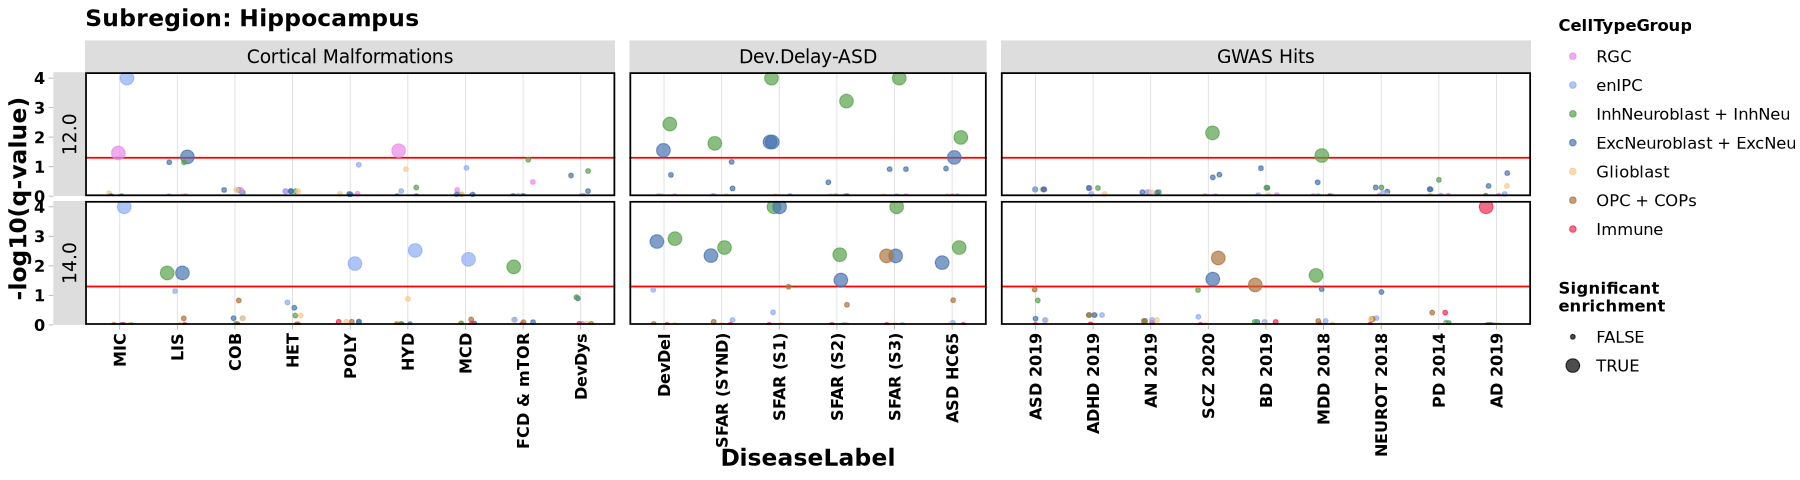

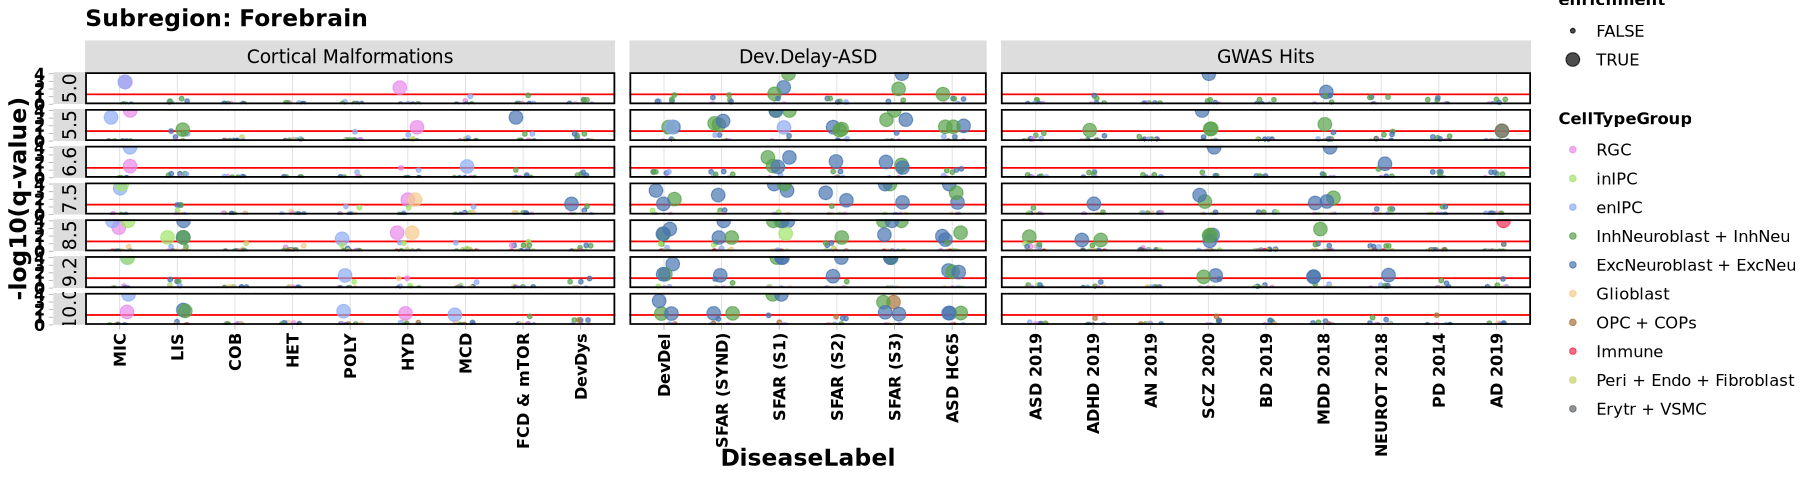

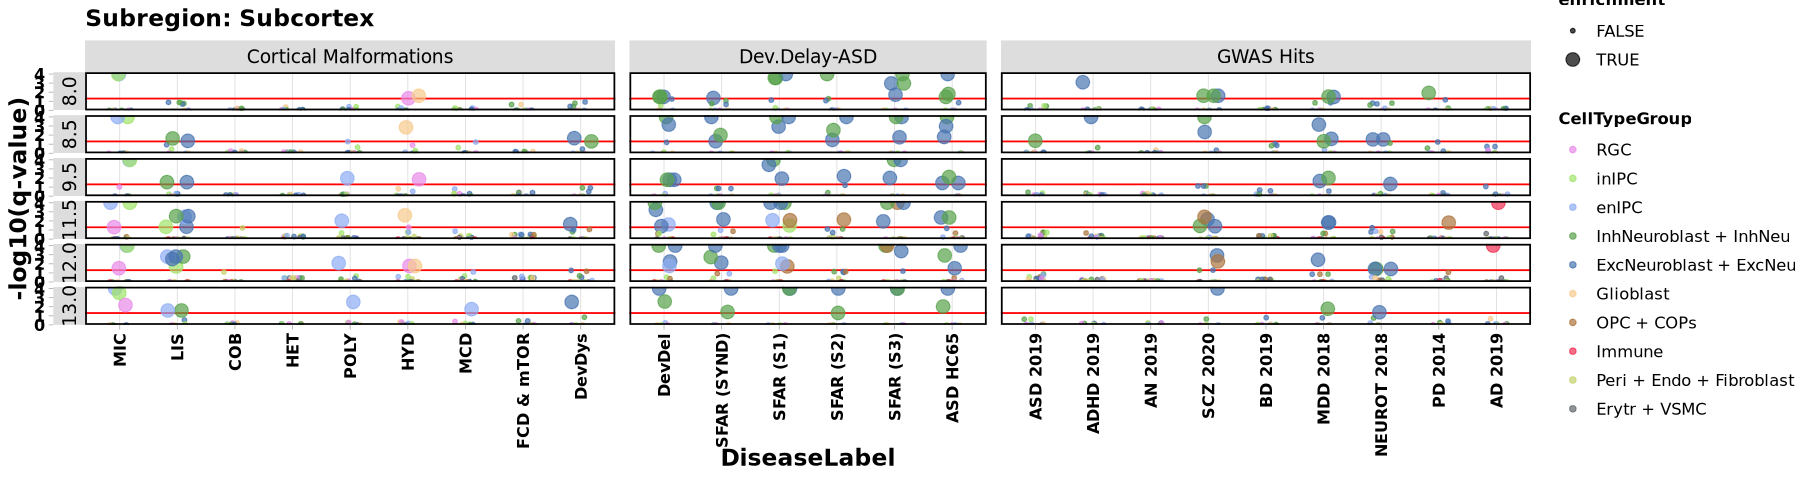

$Head

$Brain

$Striatum

$Hippocampus

$Forebrain

$Subcortex

$Cortex

$Telencephalon


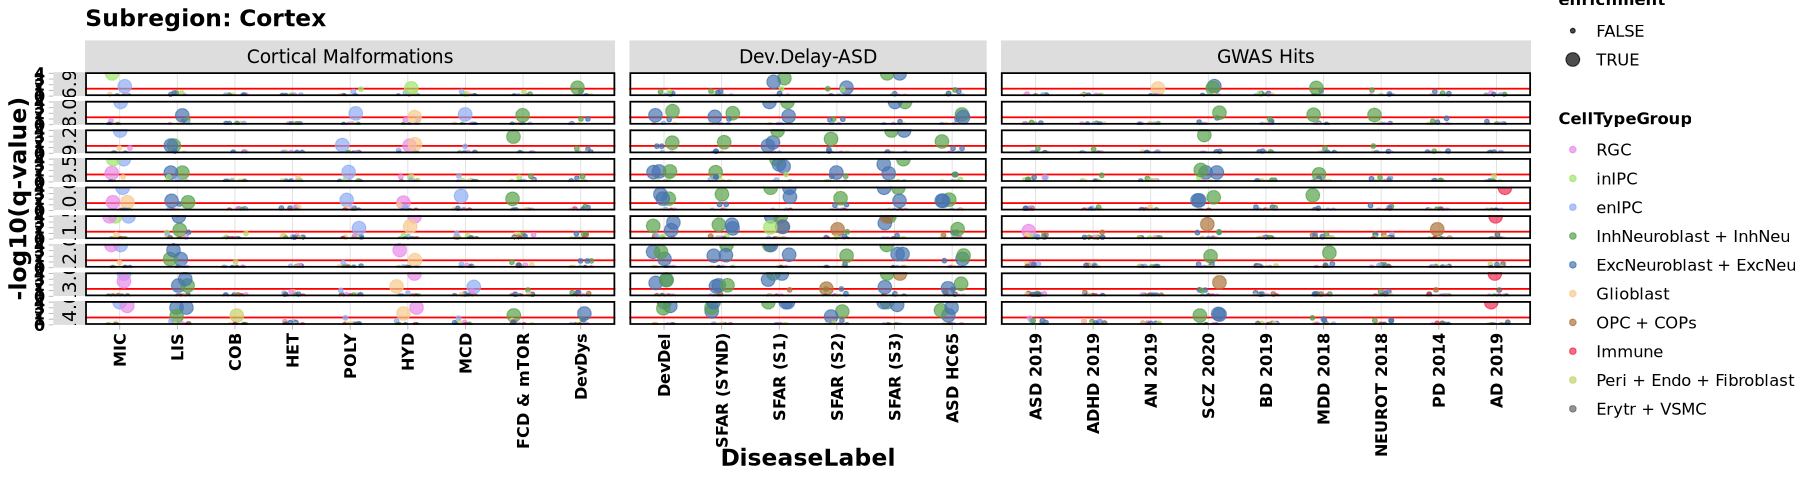

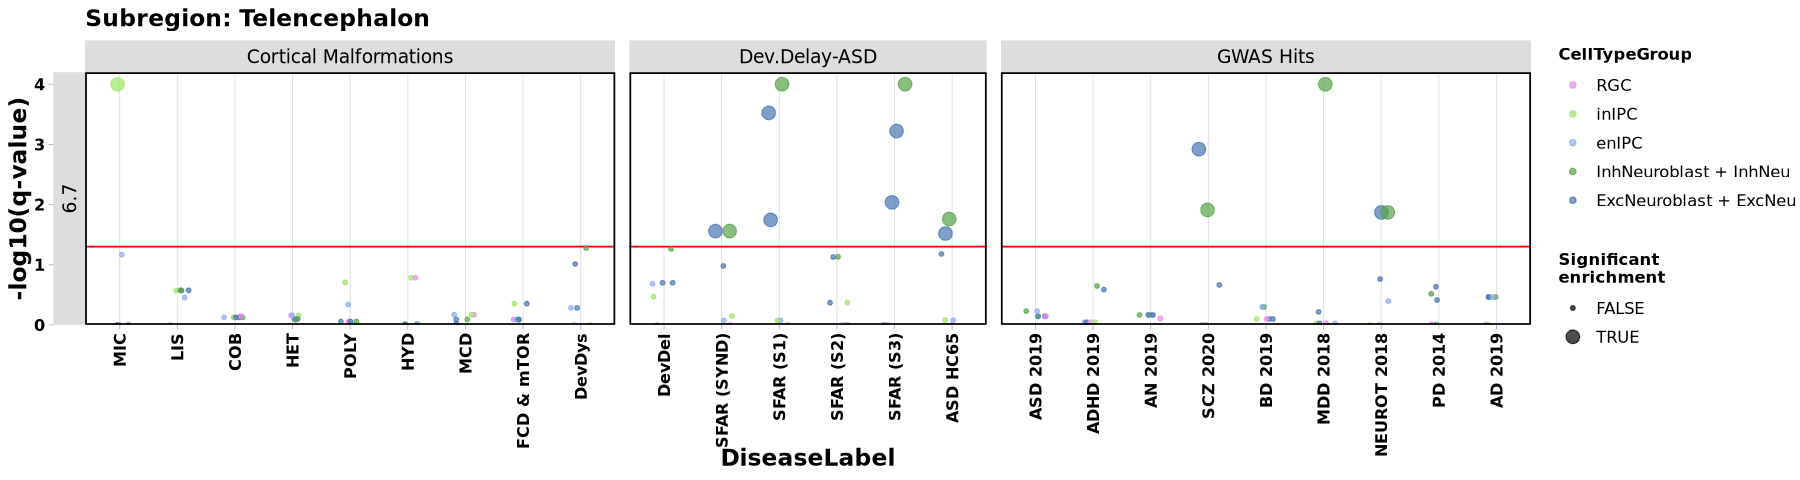

In [16]:
fig(15,4)
Manhattans(res.df, 
           list.var = 'DiseaseLabel', list.facet.var = 'DiseaseGroup', 
           color.var = 'CellTypeGroup', palette = cts.pal,
           row.facet.var = 'Age', split.var = 'Subregion'
         )

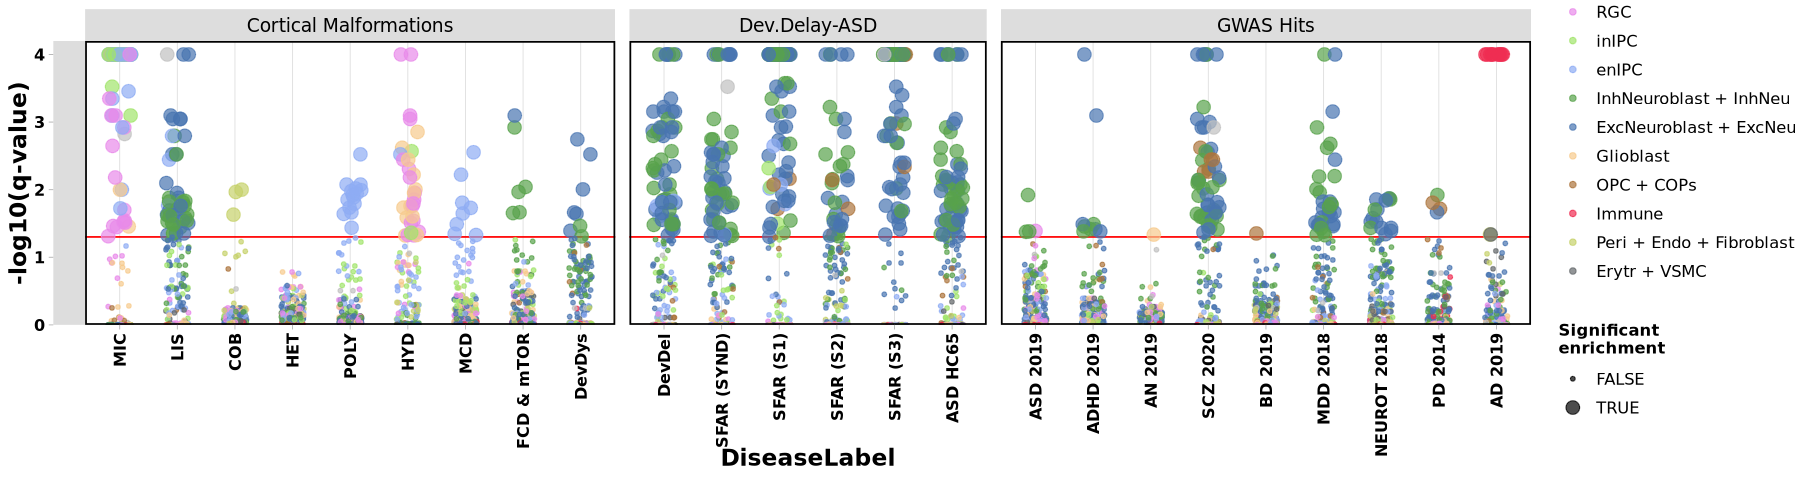

In [17]:
fig(15,4)
Manhattan(res.df, 
           list.var = 'DiseaseLabel', list.facet.var = 'DiseaseGroup', 
           color.var = 'CellTypeGroup', palette = cts.pal,
           
         )

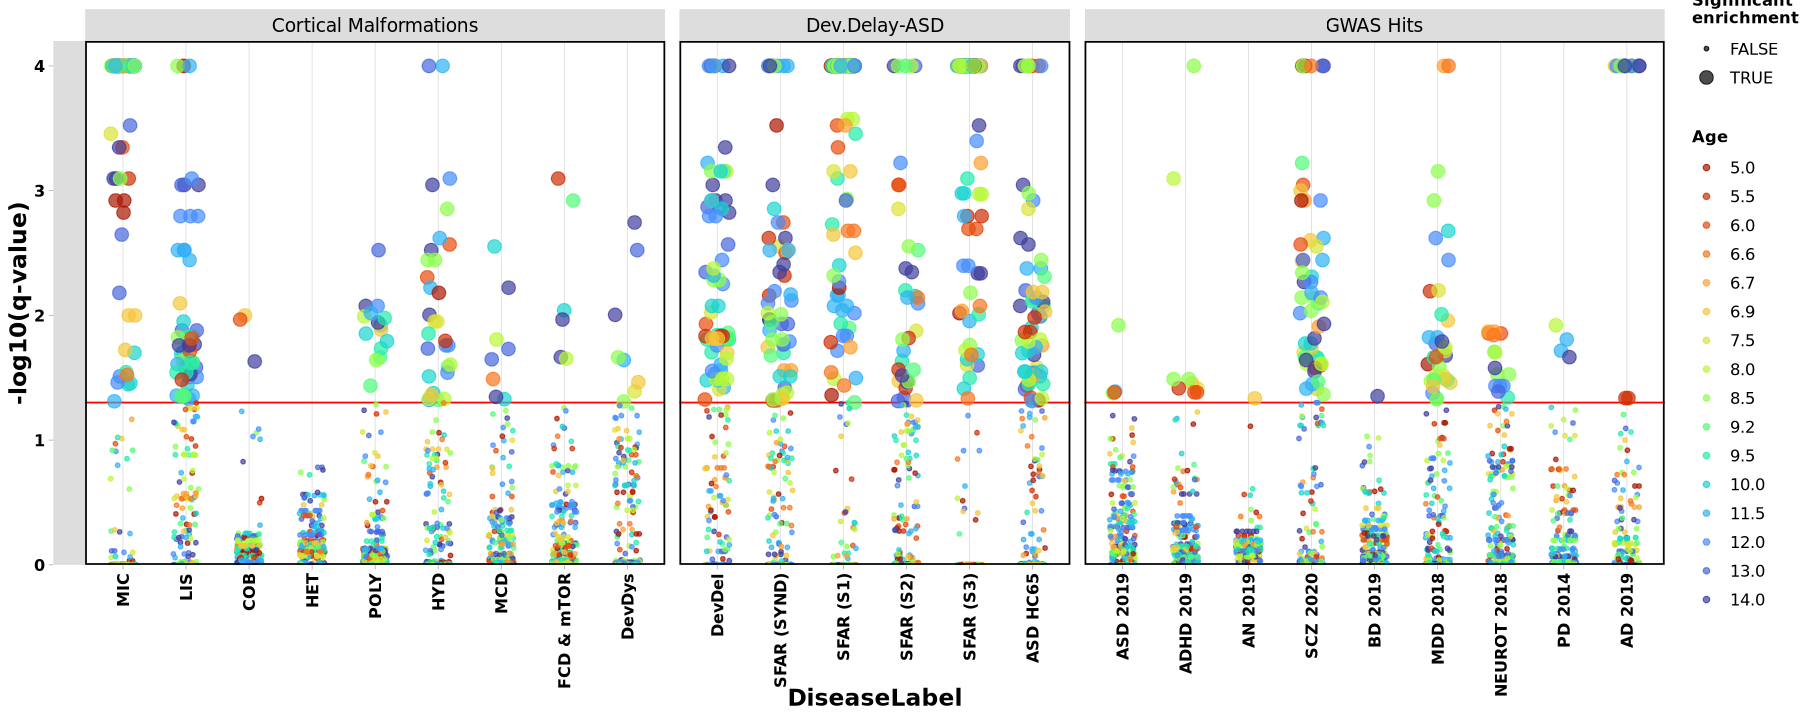

In [18]:
fig(15,6)
Manhattan(res.df, 
          list.var = 'DiseaseLabel', list.facet.var = 'DiseaseGroup', 
          color.var = 'Age', palette = ages.pal
         )

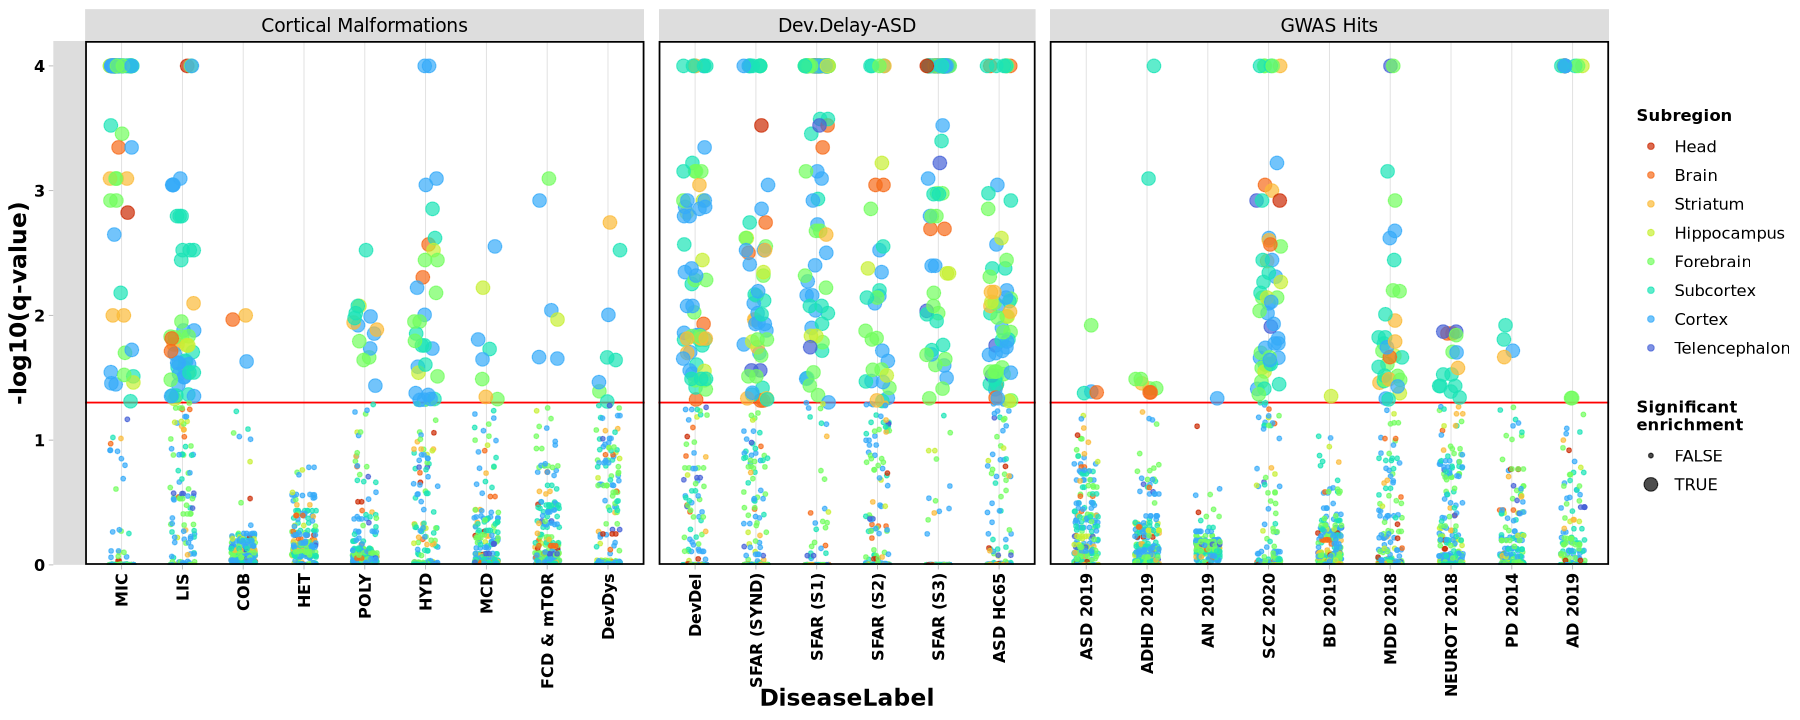

In [19]:
fig(15,6)
Manhattan(res.df, 
          list.var = 'DiseaseLabel', list.facet.var = 'DiseaseGroup', 
          color.var = 'Subregion', palette = subregions.pal
         )

## **_`H E A T M A P`_**

In [69]:
Heatmap <- function(results, 
                    fill.var = 'q.corr',
                    fill.mlog10 = T,
                    list.var = 'list', 
                    x.var = 'CellType',
                    significant.var = 'sign',
                    mask.sign = T,
                    
                    list.facet.var = NULL, 
                    col.facet.var = NULL,
                    
                    viridis_palette = 'viridis',
                    fill.limits = c(0, NA),
                    na.value = '#BBBBBB',

                    tile.color = 'black', tile.linewidth = 0.2){

    results <- results %>% mutate_if(is.factor, droplevels)

    x.name <- paste(c(col.facet.var, x.var)[!is.na(c(col.facet.var, x.var))], collapse = ' and ')

    results$fill <- if(mask.sign){ifelse(results[,significant.var], results[,fill.var], NA)} else{results[,fill.var]}
    
    if (all(is.na(results$fill))){return(NULL)}
    ggplot(results, 
           aes_string(x=x.var, 
                      y= glue('forcats::fct_rev({list.var})'),
                      fill= if(fill.mlog10){'-log10(fill)'}else{'fill'}) ) +
    theme_light() +
    scale_fill_viridis_c(option = viridis_palette, limits = fill.limits, na.value = na.value) +
    ggpubr::labs_pubr() +
    scale_x_discrete(position = 'top') +
    labs(x = x.name, y = list.var, fill=fill.var) +
    theme(
        axis.text.x.top = element_text(angle = 90, hjust = 0, vjust=0.5), 
        strip.placement = 'outside',
        strip.text = element_text(color = 'black', angle = 90, hjust = 0, vjust=0.5),
        strip.text.y.left = element_text(color = 'black', angle=0, hjust = 0.5),
        strip.background = element_rect(fill='#DDDDDD', color = 'transparent'),
        legend.position = 'top',  
        panel.grid.major = element_blank(), 
        panel.spacing.y = unit(.5, 'mm'),
        panel.spacing.x = unit(.5, 'mm')) -> p

    p <- p + geom_tile(color = tile.color, linewidth = tile.linewidth)

    if(!all(is.null(list.facet.var), is.null(col.facet.var))){
        
        p$data$facet.list <- if(is.null(list.facet.var)){''}else{p$data[,list.facet.var]}
        p$data$facet.col <- if(is.null(col.facet.var)){''}else{p$data[,col.facet.var]}
        
        p <- p + facet_grid(cols = vars(facet.col), 
                            rows = vars(facet.list), 
                            scales = 'free', space='free', switch = 'y')
    }



    return(p)
}

Heatmaps <- function(results, split.var, ...){
    return(
        split(results, droplevels(results[,split.var])) %>%
        lapply(function(x){
            p<- Heatmap(results = x, ...) 
            if (!is.null(p)){
                return(p+ ggtitle(glue('{split.var}: {x[,split.var] %>% unique}')))}
        })
    )
}

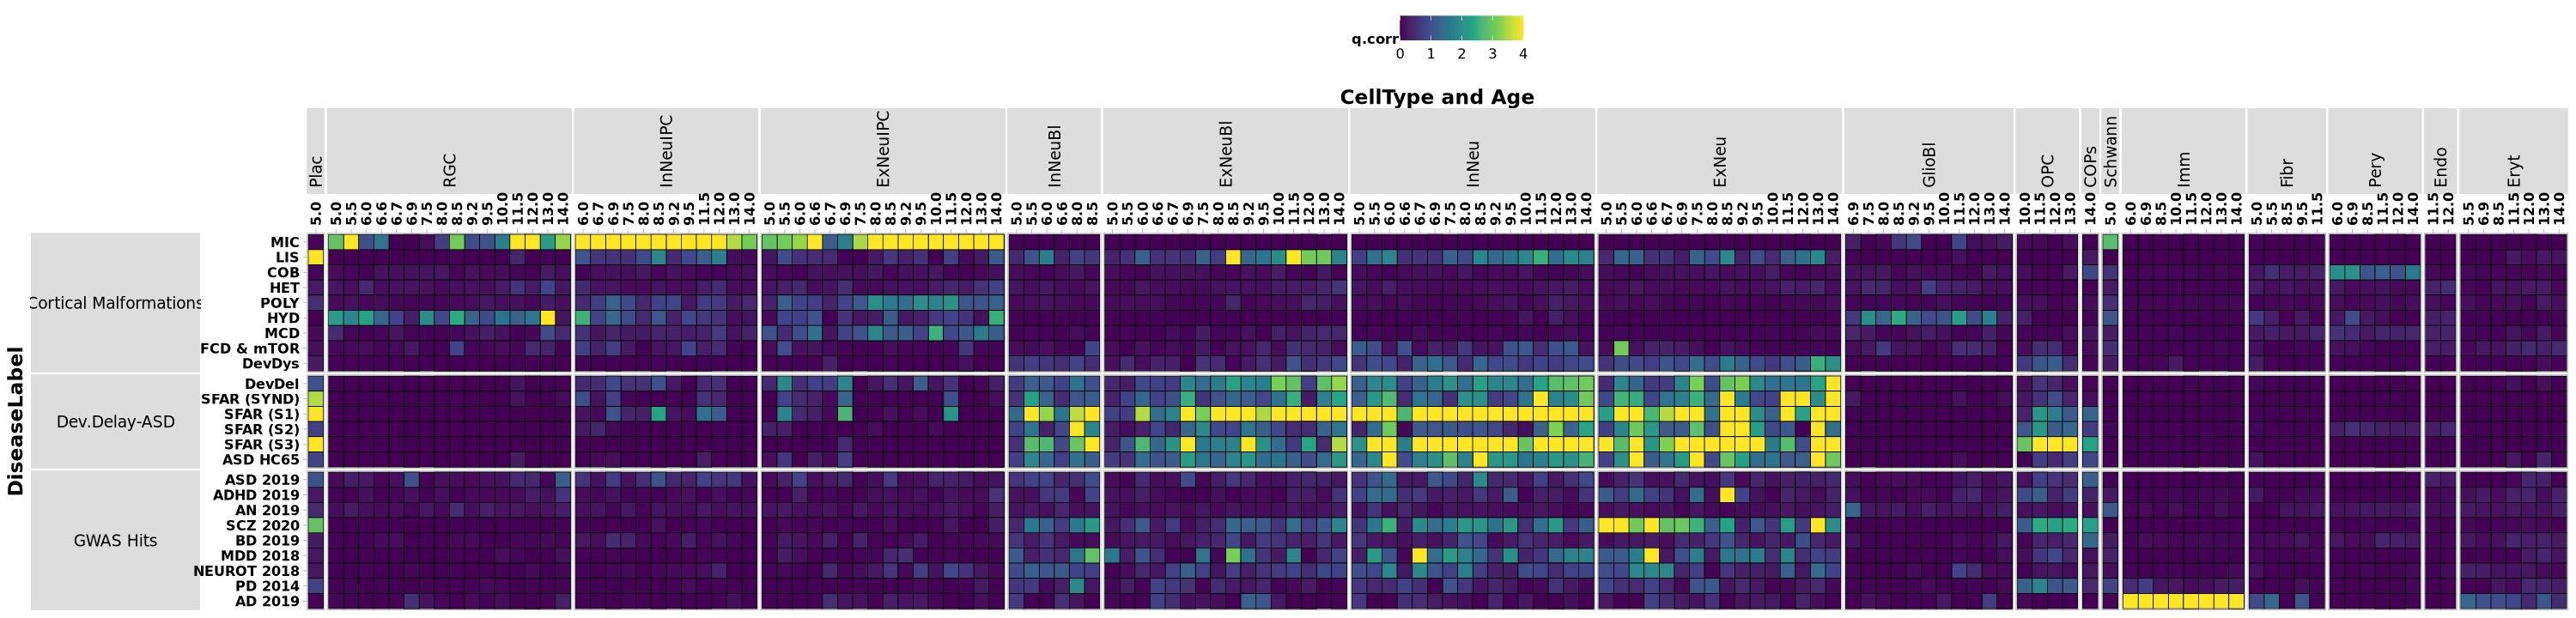

In [70]:
fig(25,6)
Heatmap(res.df, 
        x.var = 'Age', col.facet.var = 'CellType', 
        mask.sign = F, 
        # na.value = 'transparent',
        list.var = 'DiseaseLabel', list.facet.var = 'DiseaseGroup') ->p
p

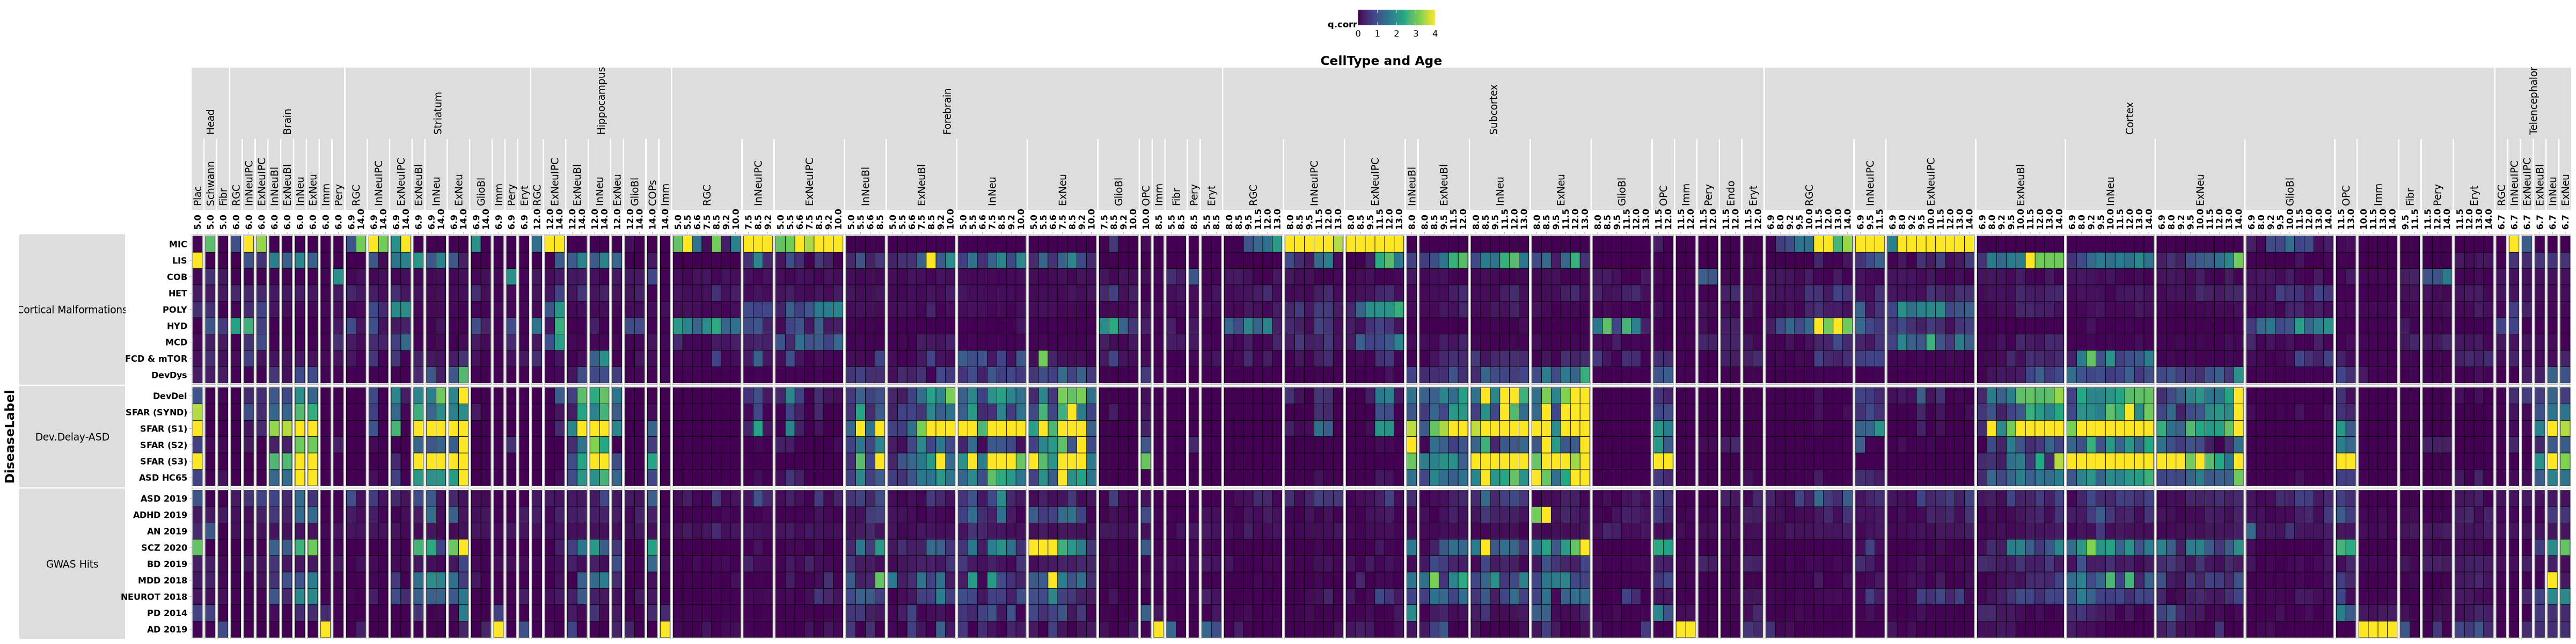

In [ ]:
fig(40,10)
Heatmap(res.df, 
        x.var = 'Age', col.facet.var = 'CellType', 
        mask.sign = F, 
        list.var = 'DiseaseLabel', list.facet.var = 'DiseaseGroup') + facet_nested(rows = vars(DiseaseGroup), cols = vars(Subregion, CellType), scales = 'free', space = 'free', switch = 'y')

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


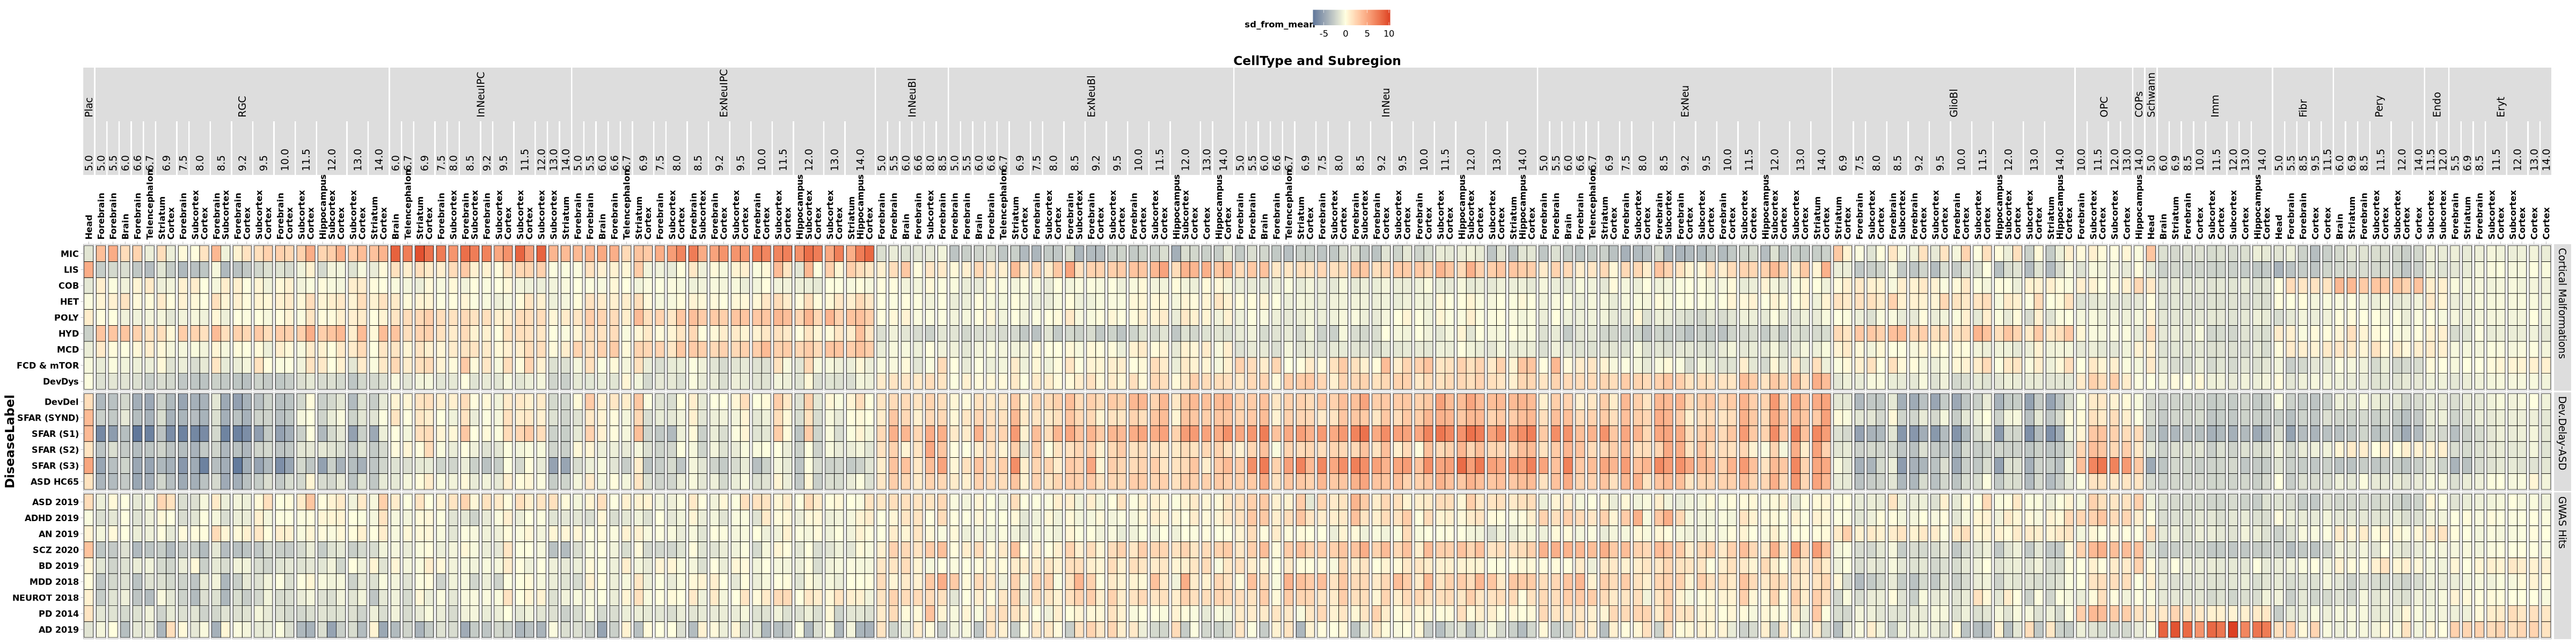

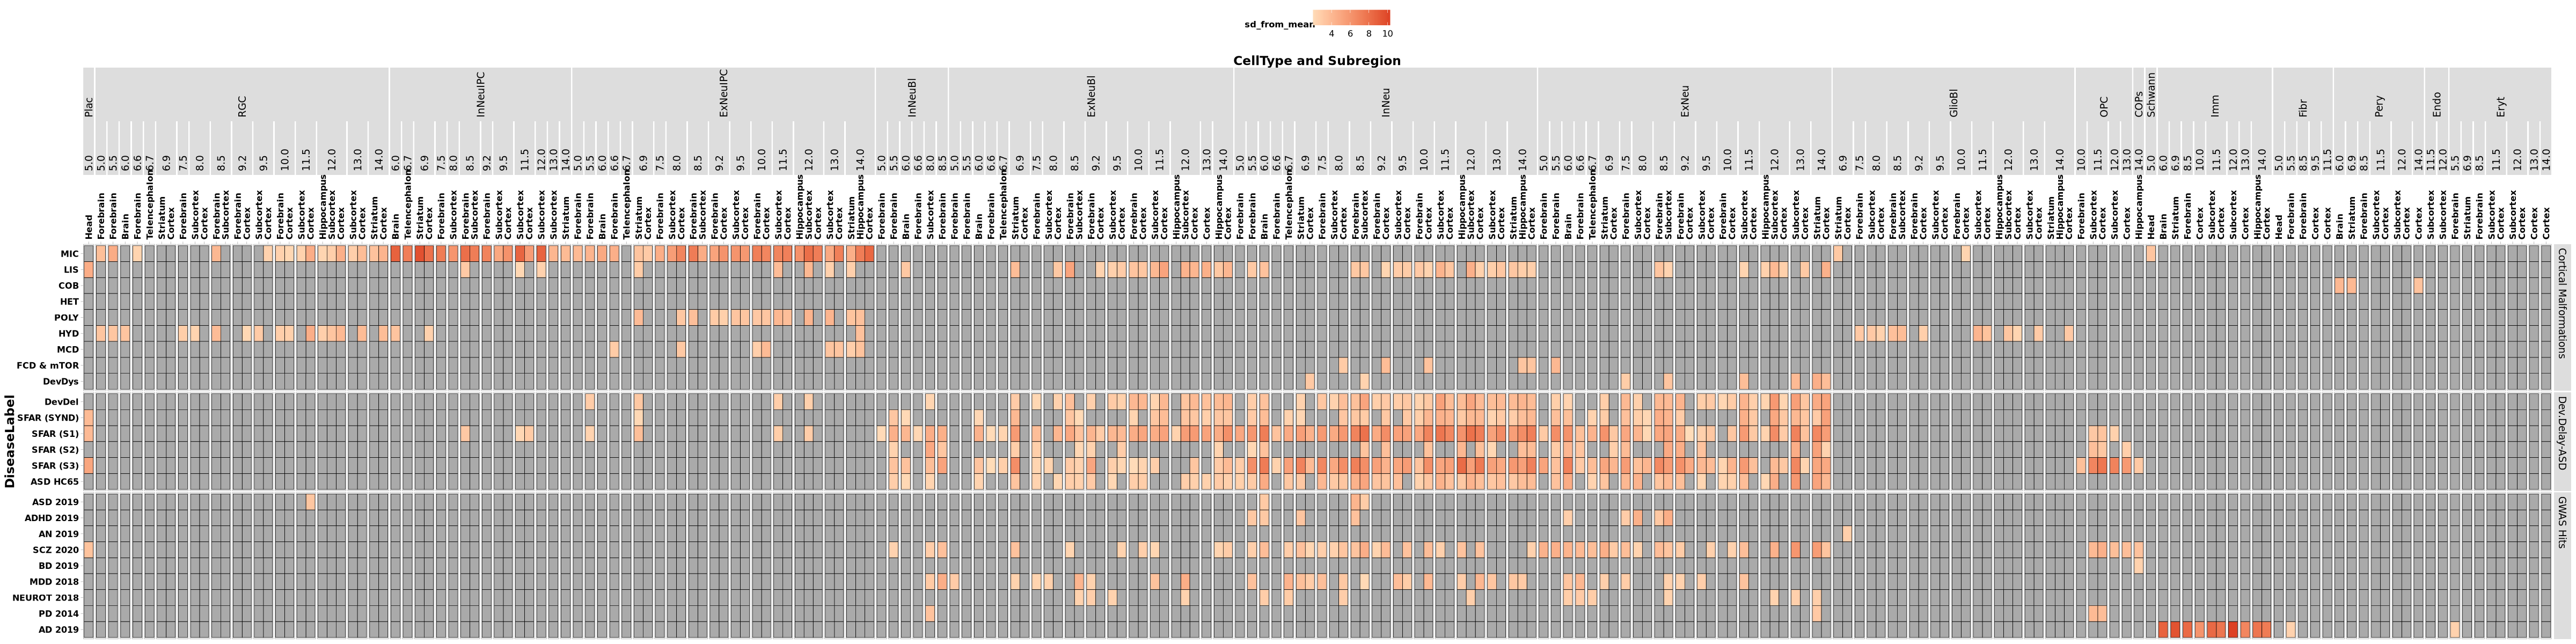

In [72]:
fig(40,10)
Heatmap(res.df,  fill.var = 'sd_from_mean', fill.mlog10 = F, 
        fill.limits = c(NA,NA),
        x.var = 'Subregion', col.facet.var = 'CellType', 
        mask.sign = F, 
        # na.value = 'transparent',
        viridis_palette = 'turbo',
        list.var = 'DiseaseLabel', list.facet.var = 'DiseaseGroup') + 
    facet_nested(rows = vars(DiseaseGroup), cols = vars(CellType, Age), scales = 'free', space = 'free') +
    scale_fill_gradient2(low = '#0f4c81', high = '#dd4124', mid = 'lightyellow', midpoint = 0, na.value = '#AAAAAA')


Heatmap(res.df,  fill.var = 'sd_from_mean', fill.mlog10 = F, 
        fill.limits = c(NA,NA),
        x.var = 'Subregion', col.facet.var = 'CellType', 
        mask.sign = T, 
        # na.value = 'transparent',
        viridis_palette = 'turbo',
        list.var = 'DiseaseLabel', list.facet.var = 'DiseaseGroup') + 
    facet_nested(rows = vars(DiseaseGroup), cols = vars(CellType, Age), scales = 'free', space = 'free') +
    scale_fill_gradient2(low = '#0f4c81', high = '#dd4124', mid = 'lightyellow', midpoint = 0, na.value = '#AAAAAA')

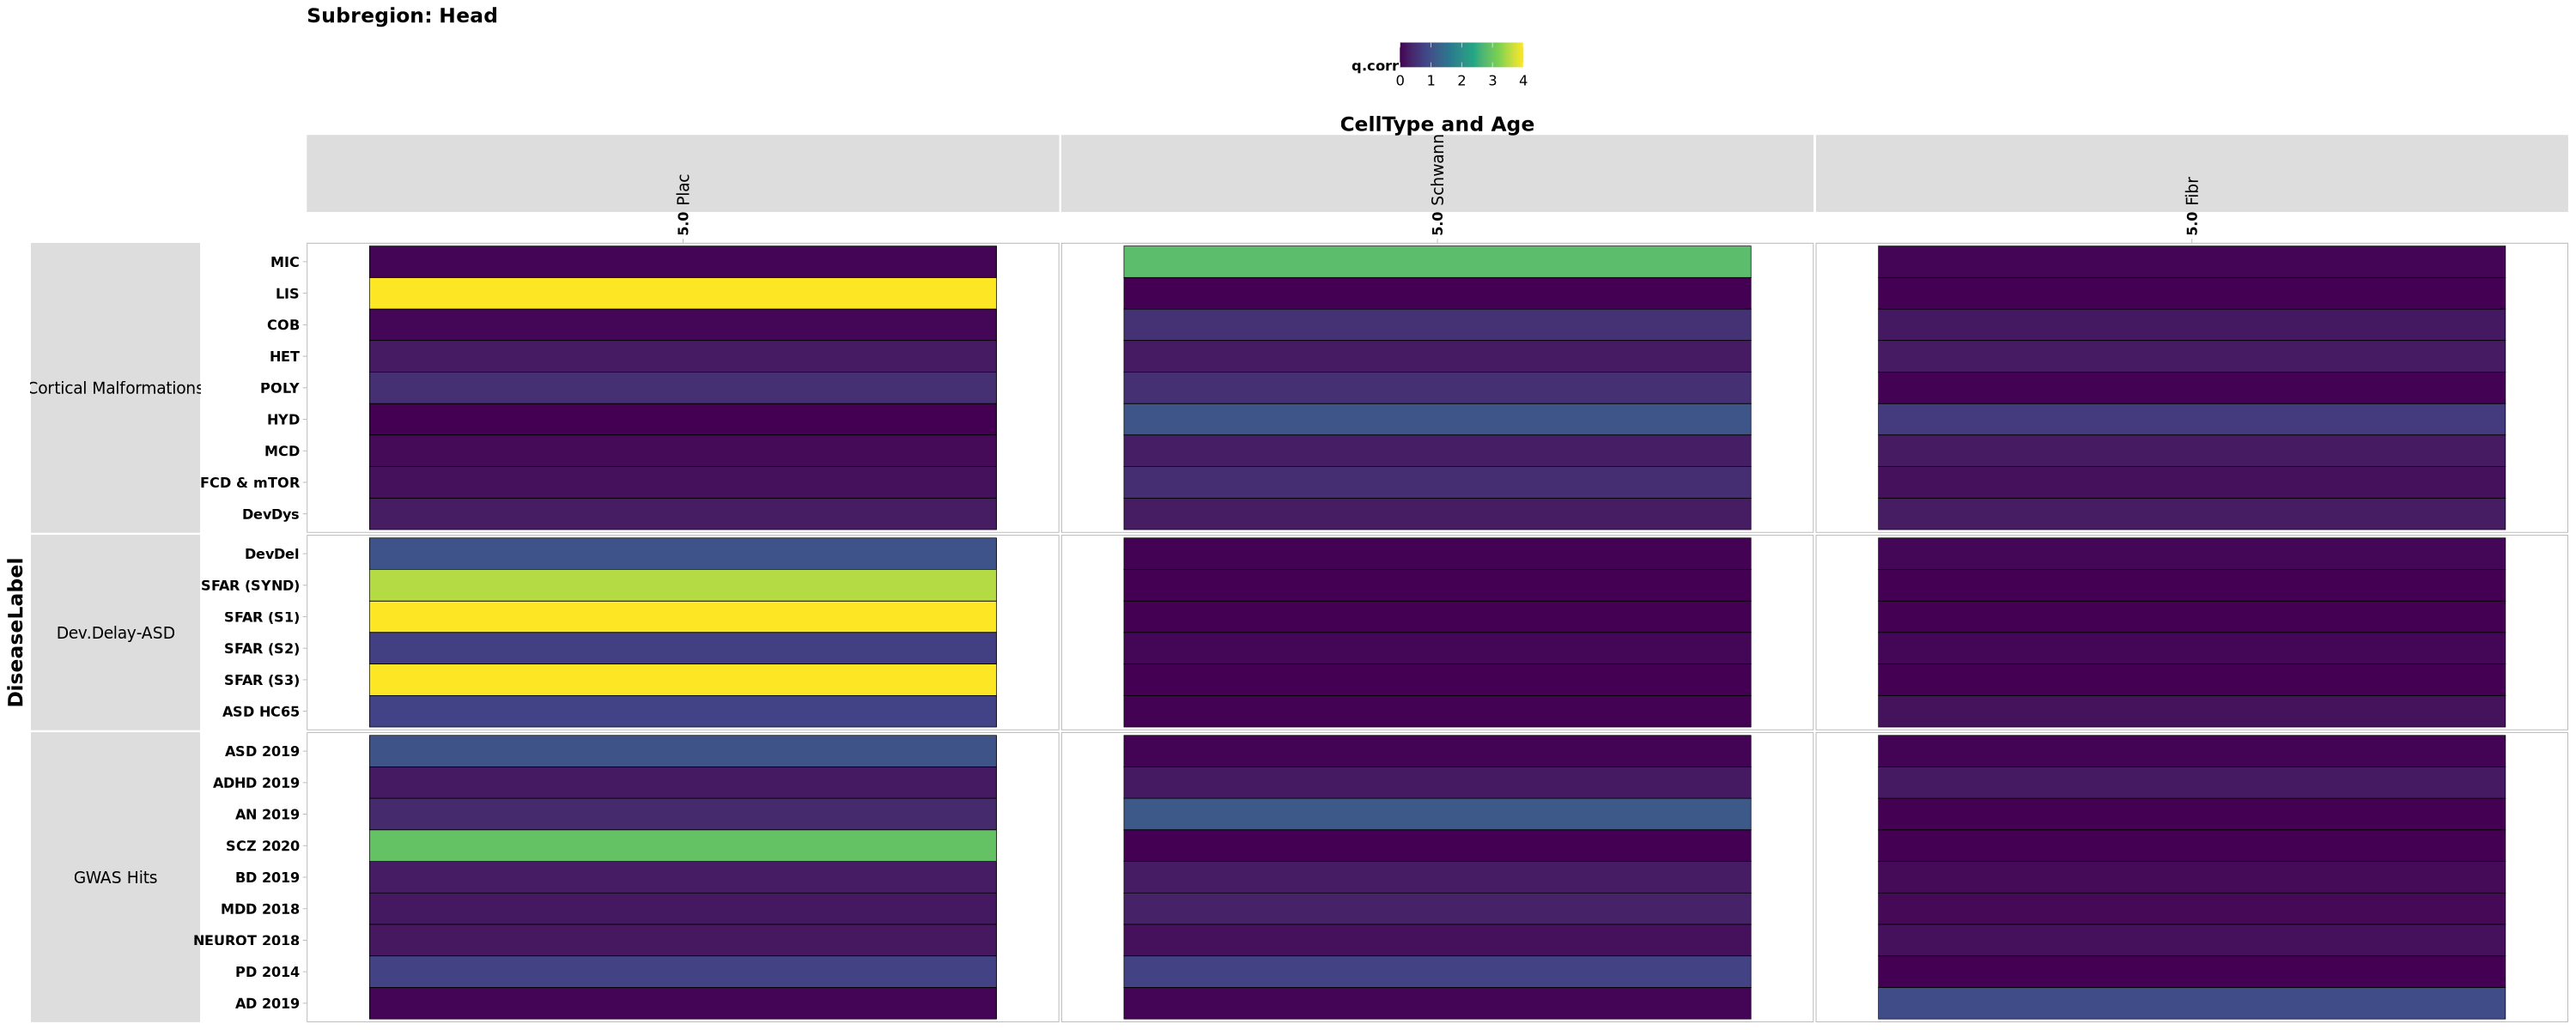

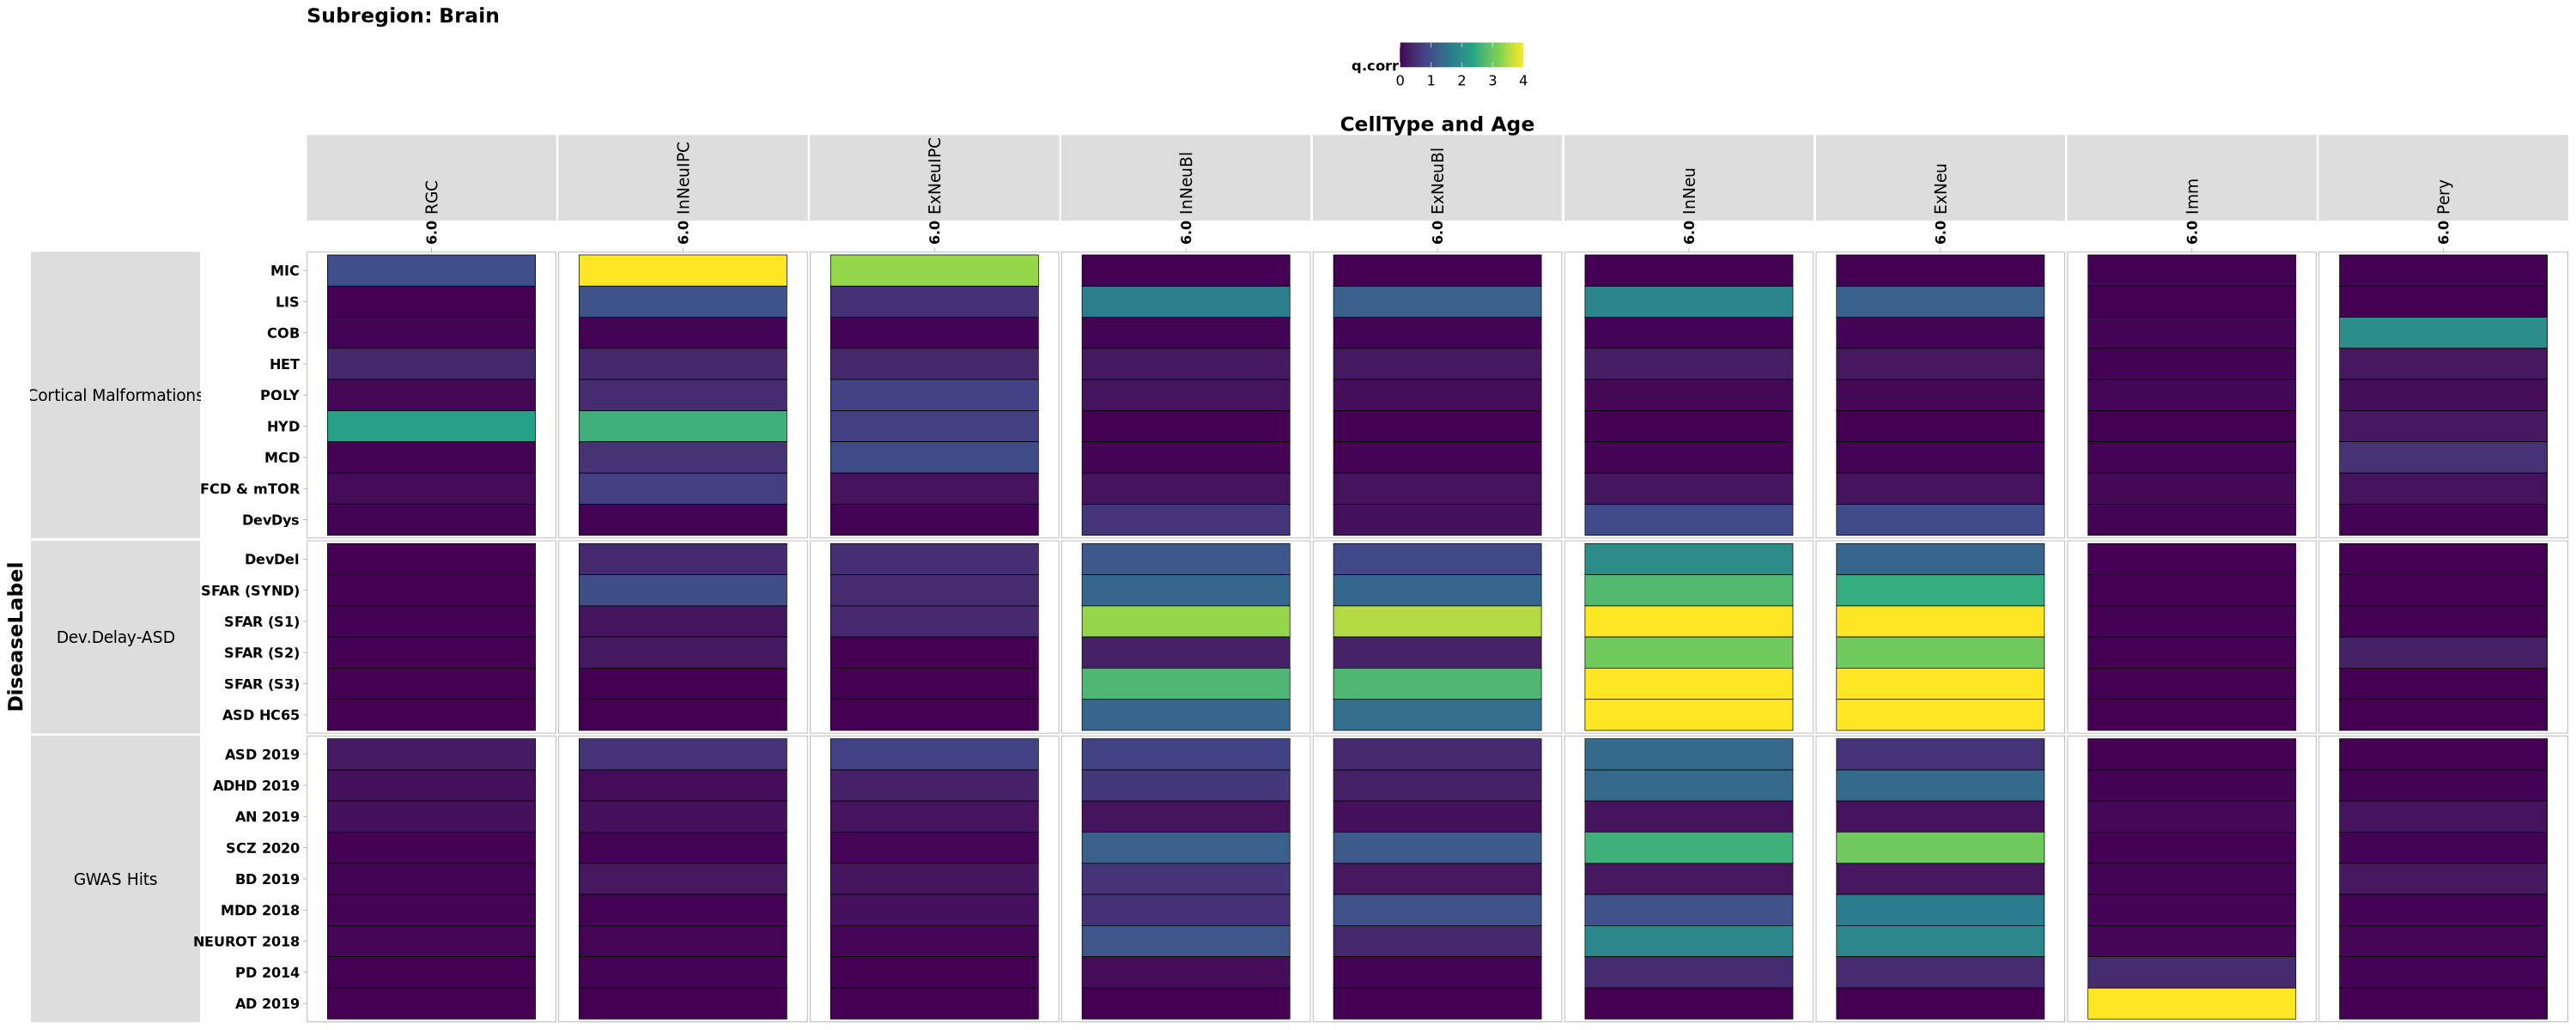

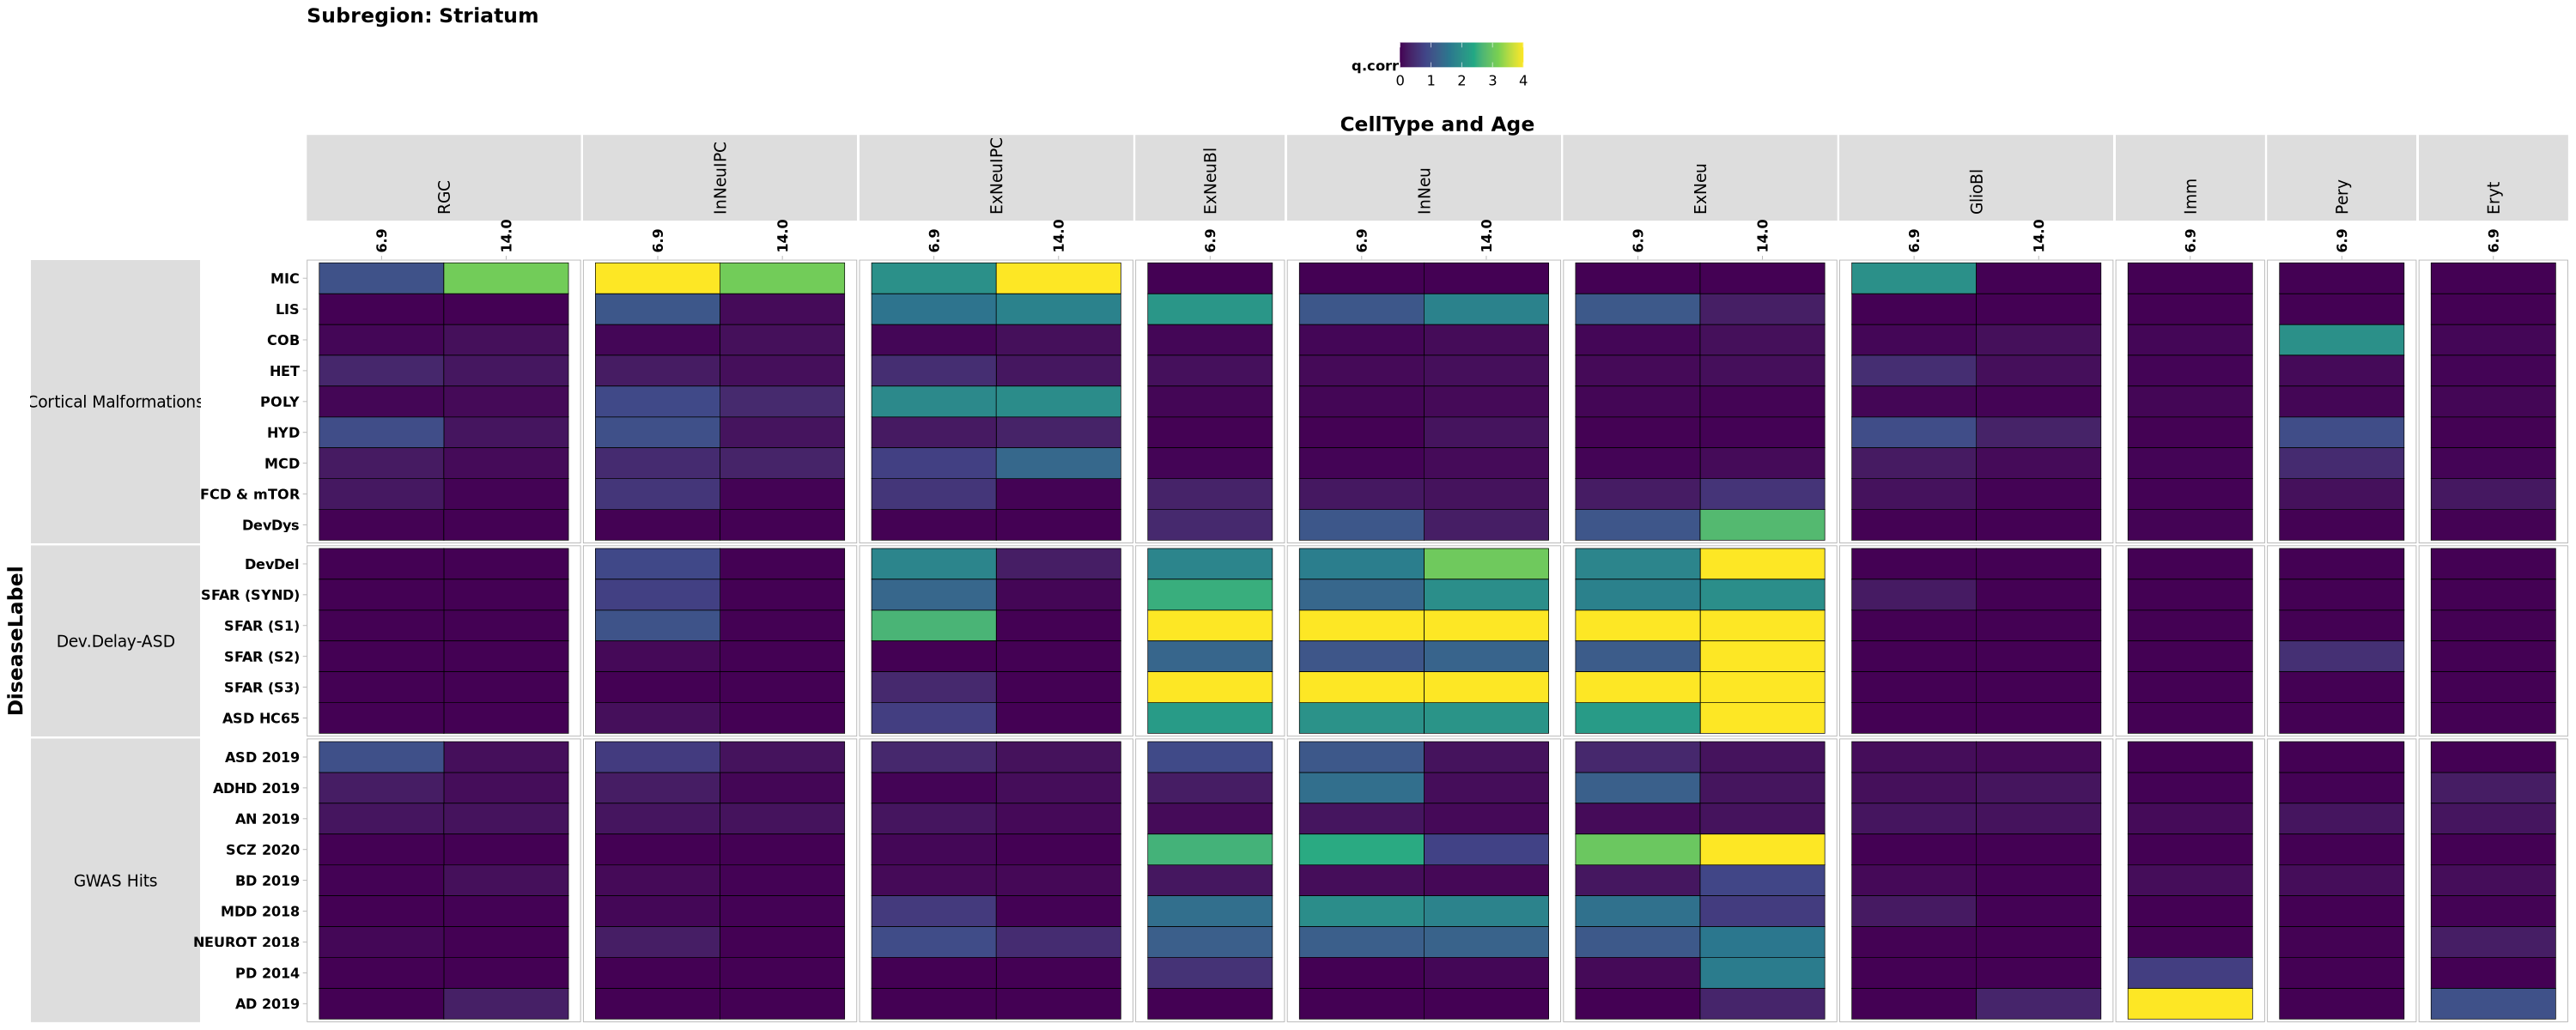

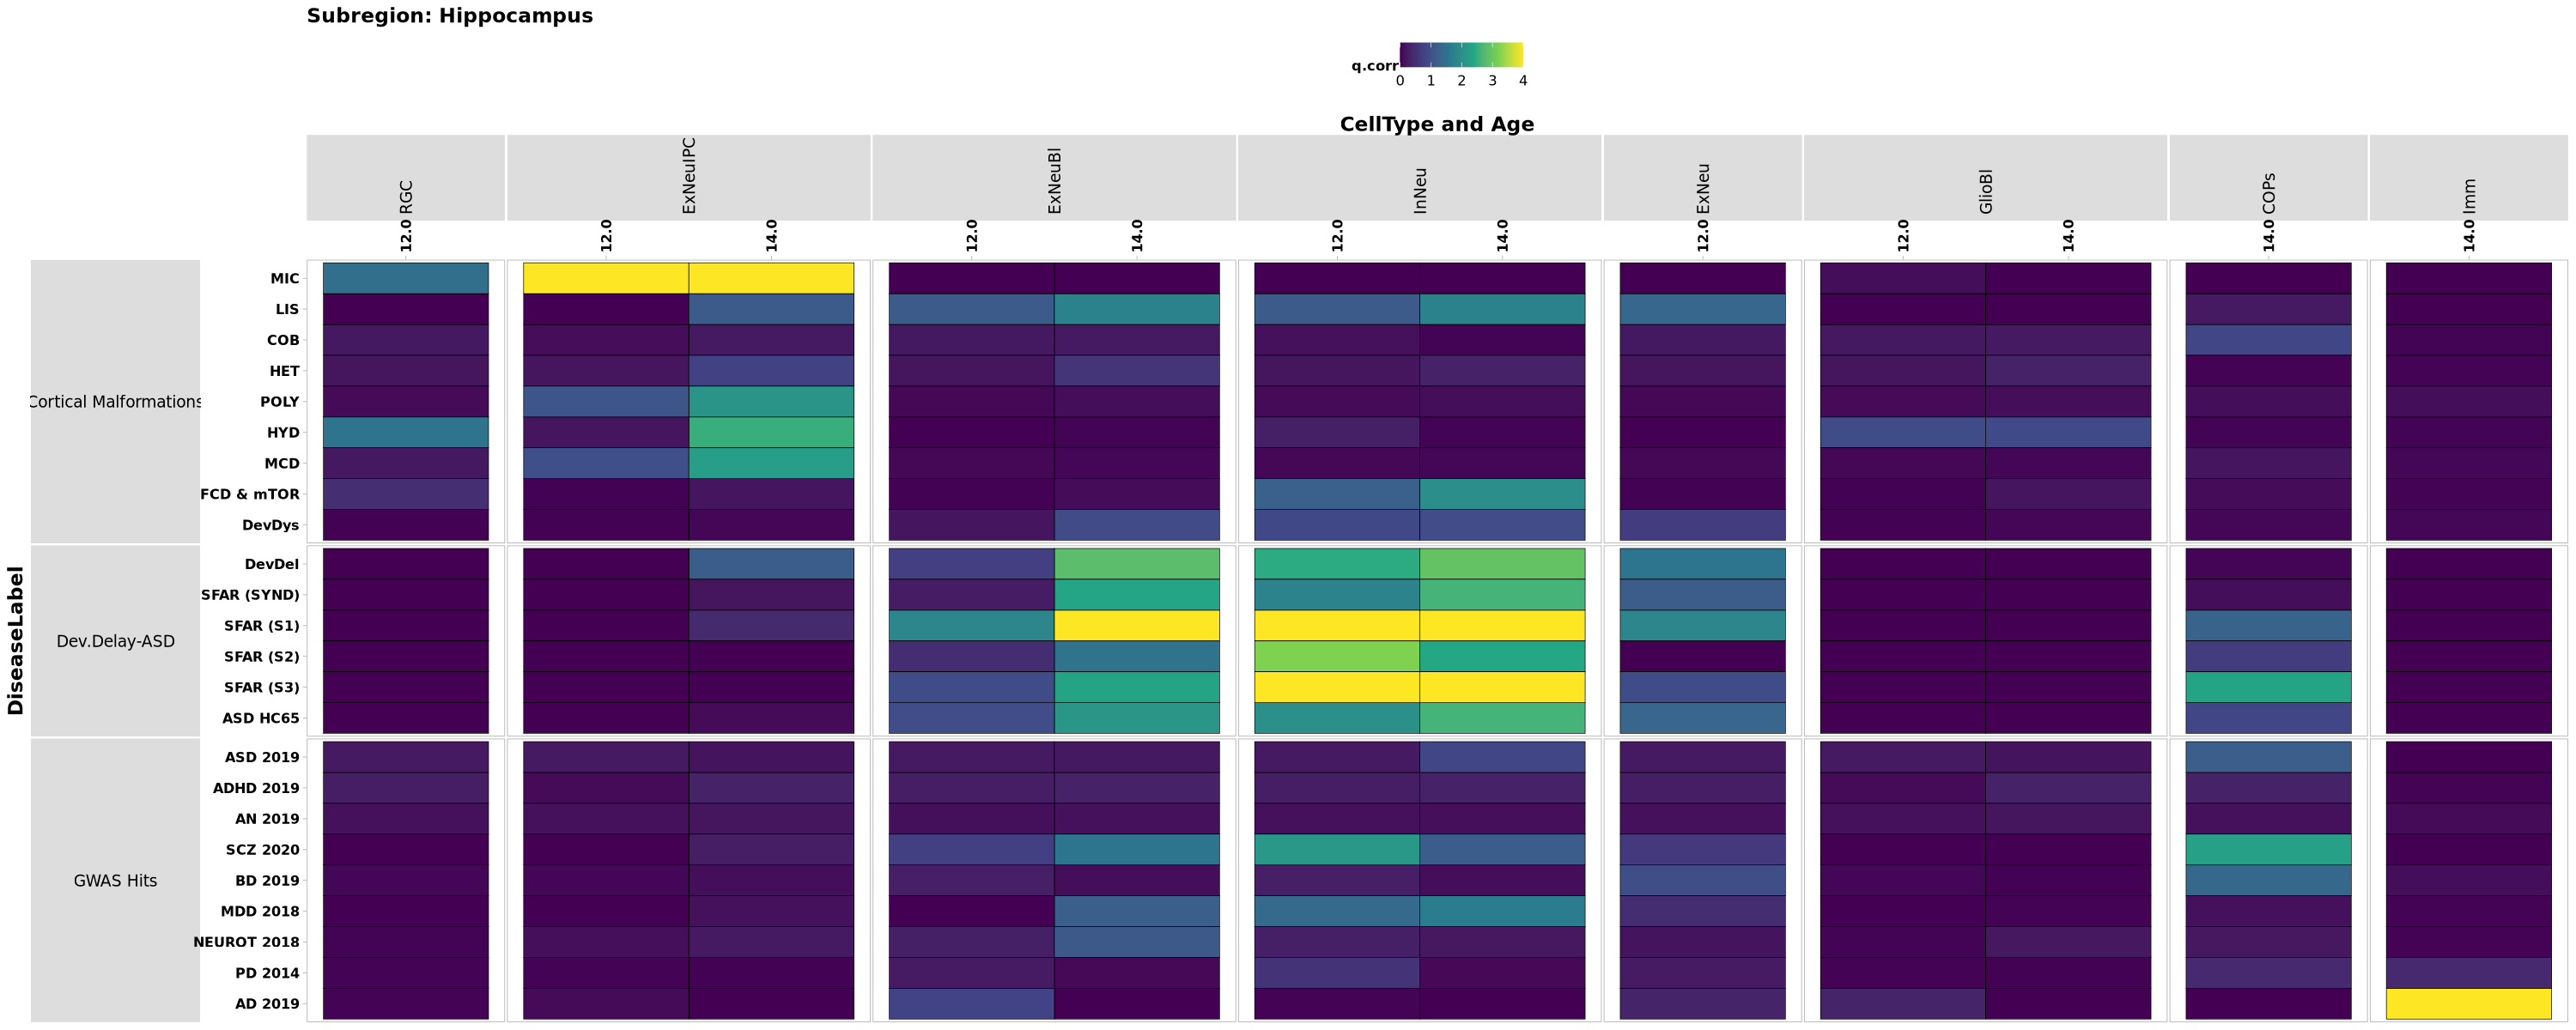

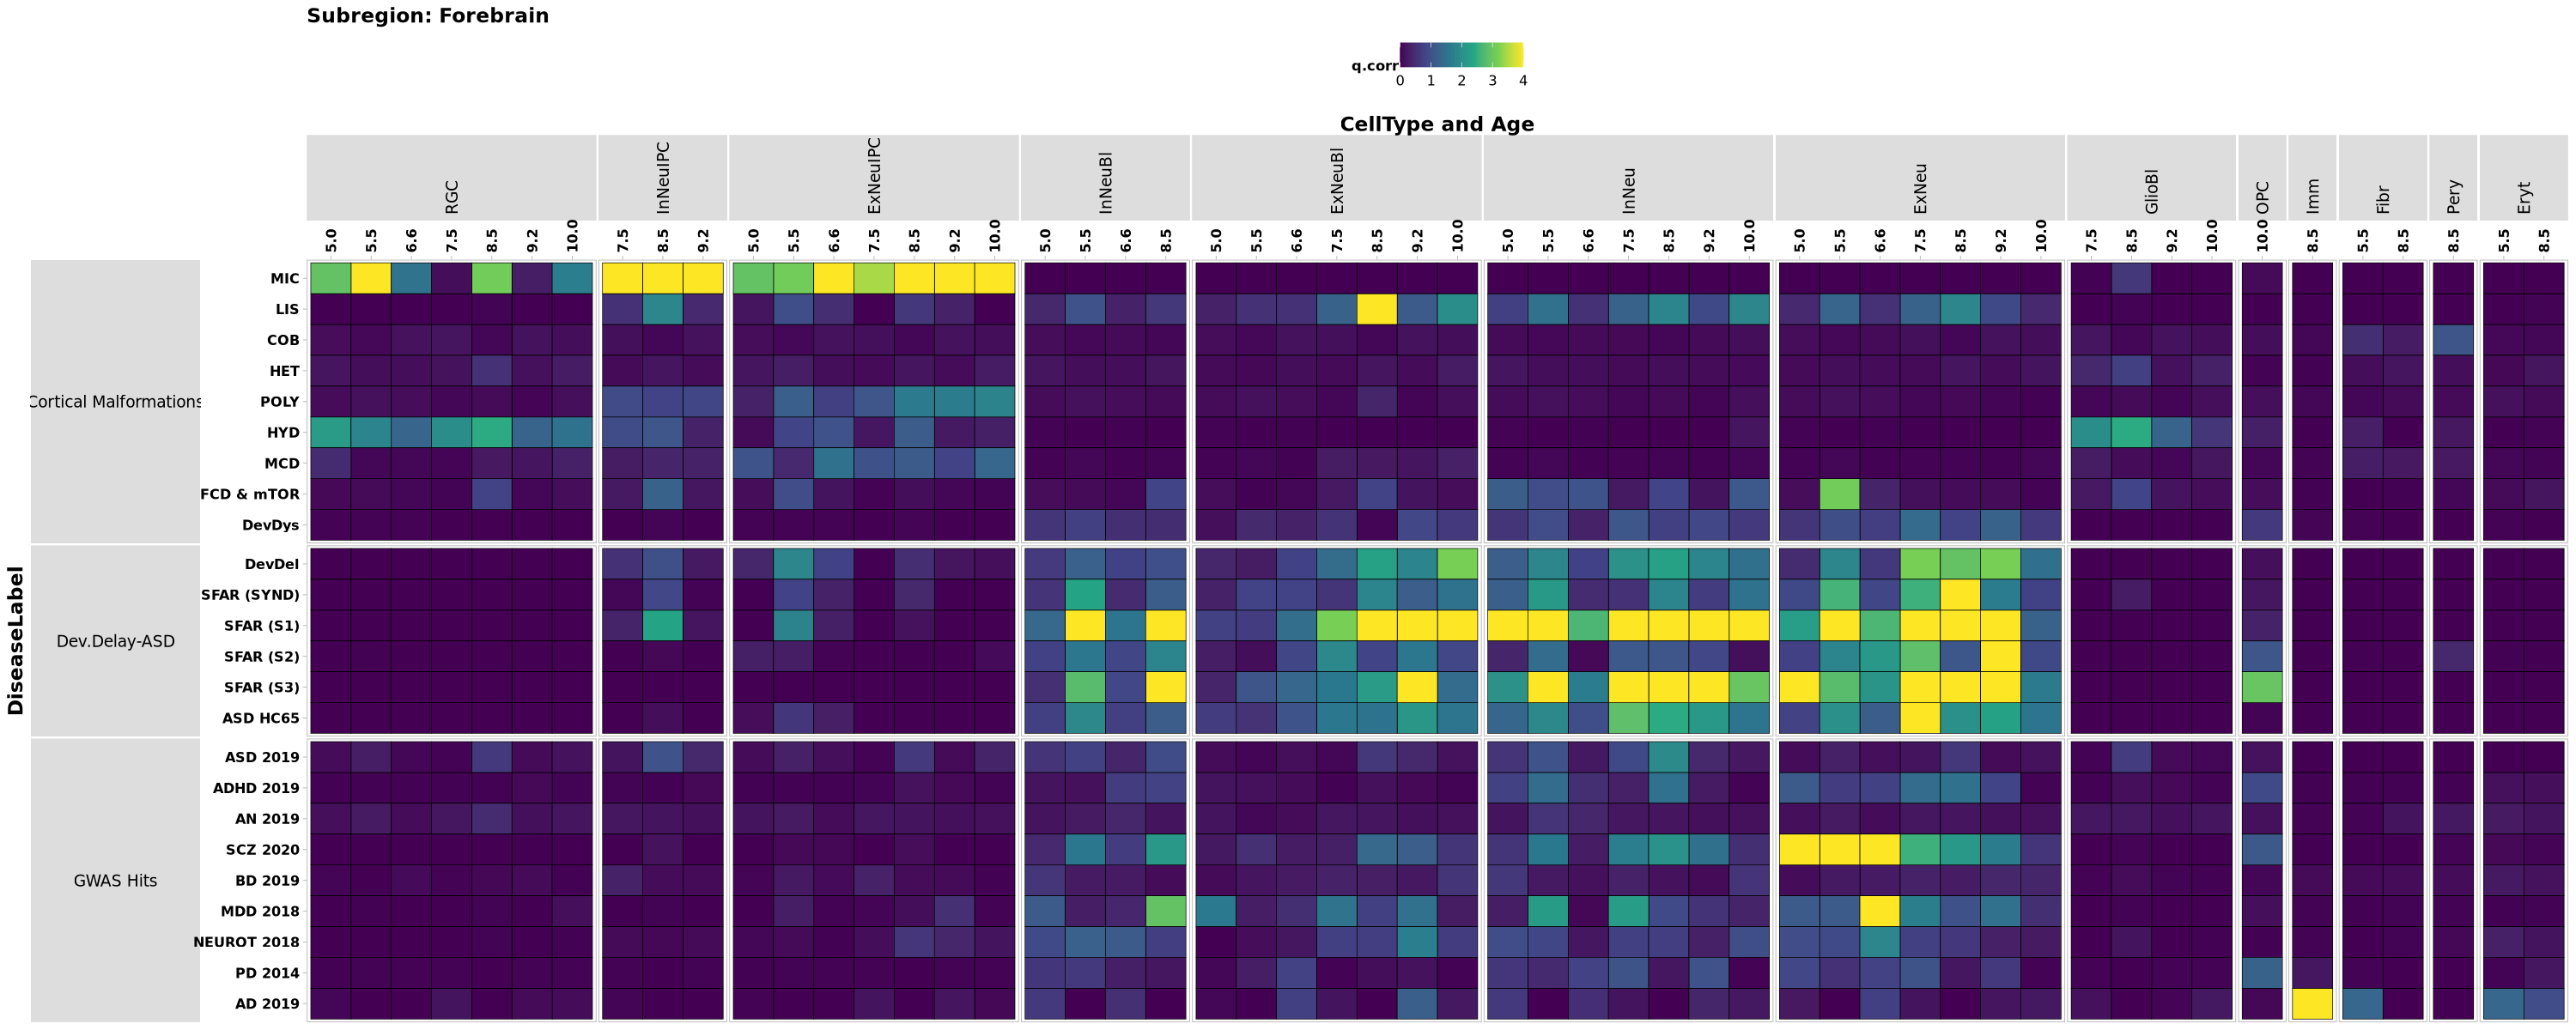

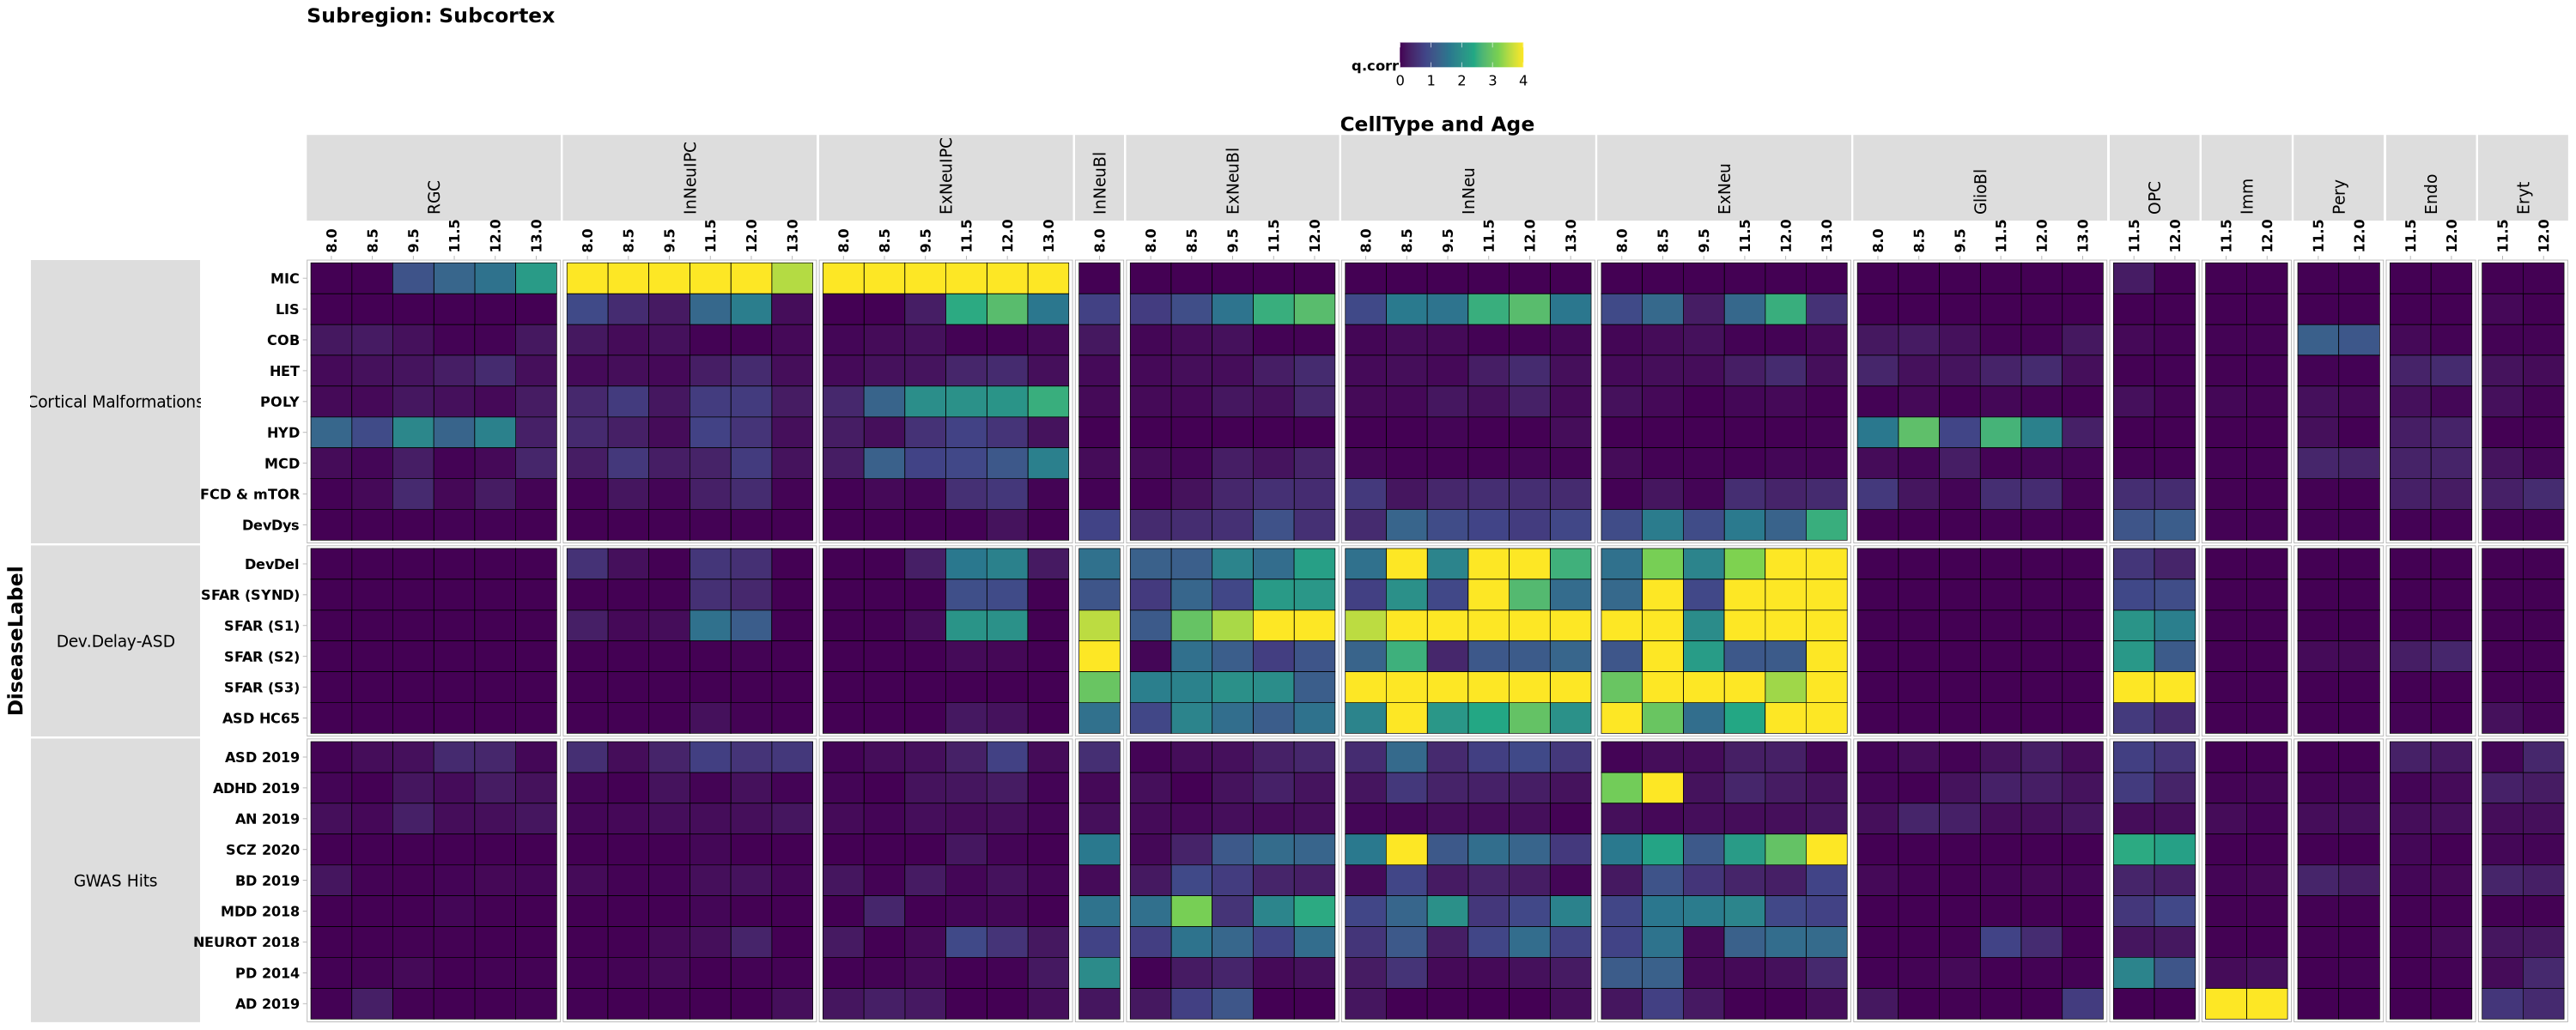

$Head

$Brain

$Striatum

$Hippocampus

$Forebrain

$Subcortex

$Cortex

$Telencephalon


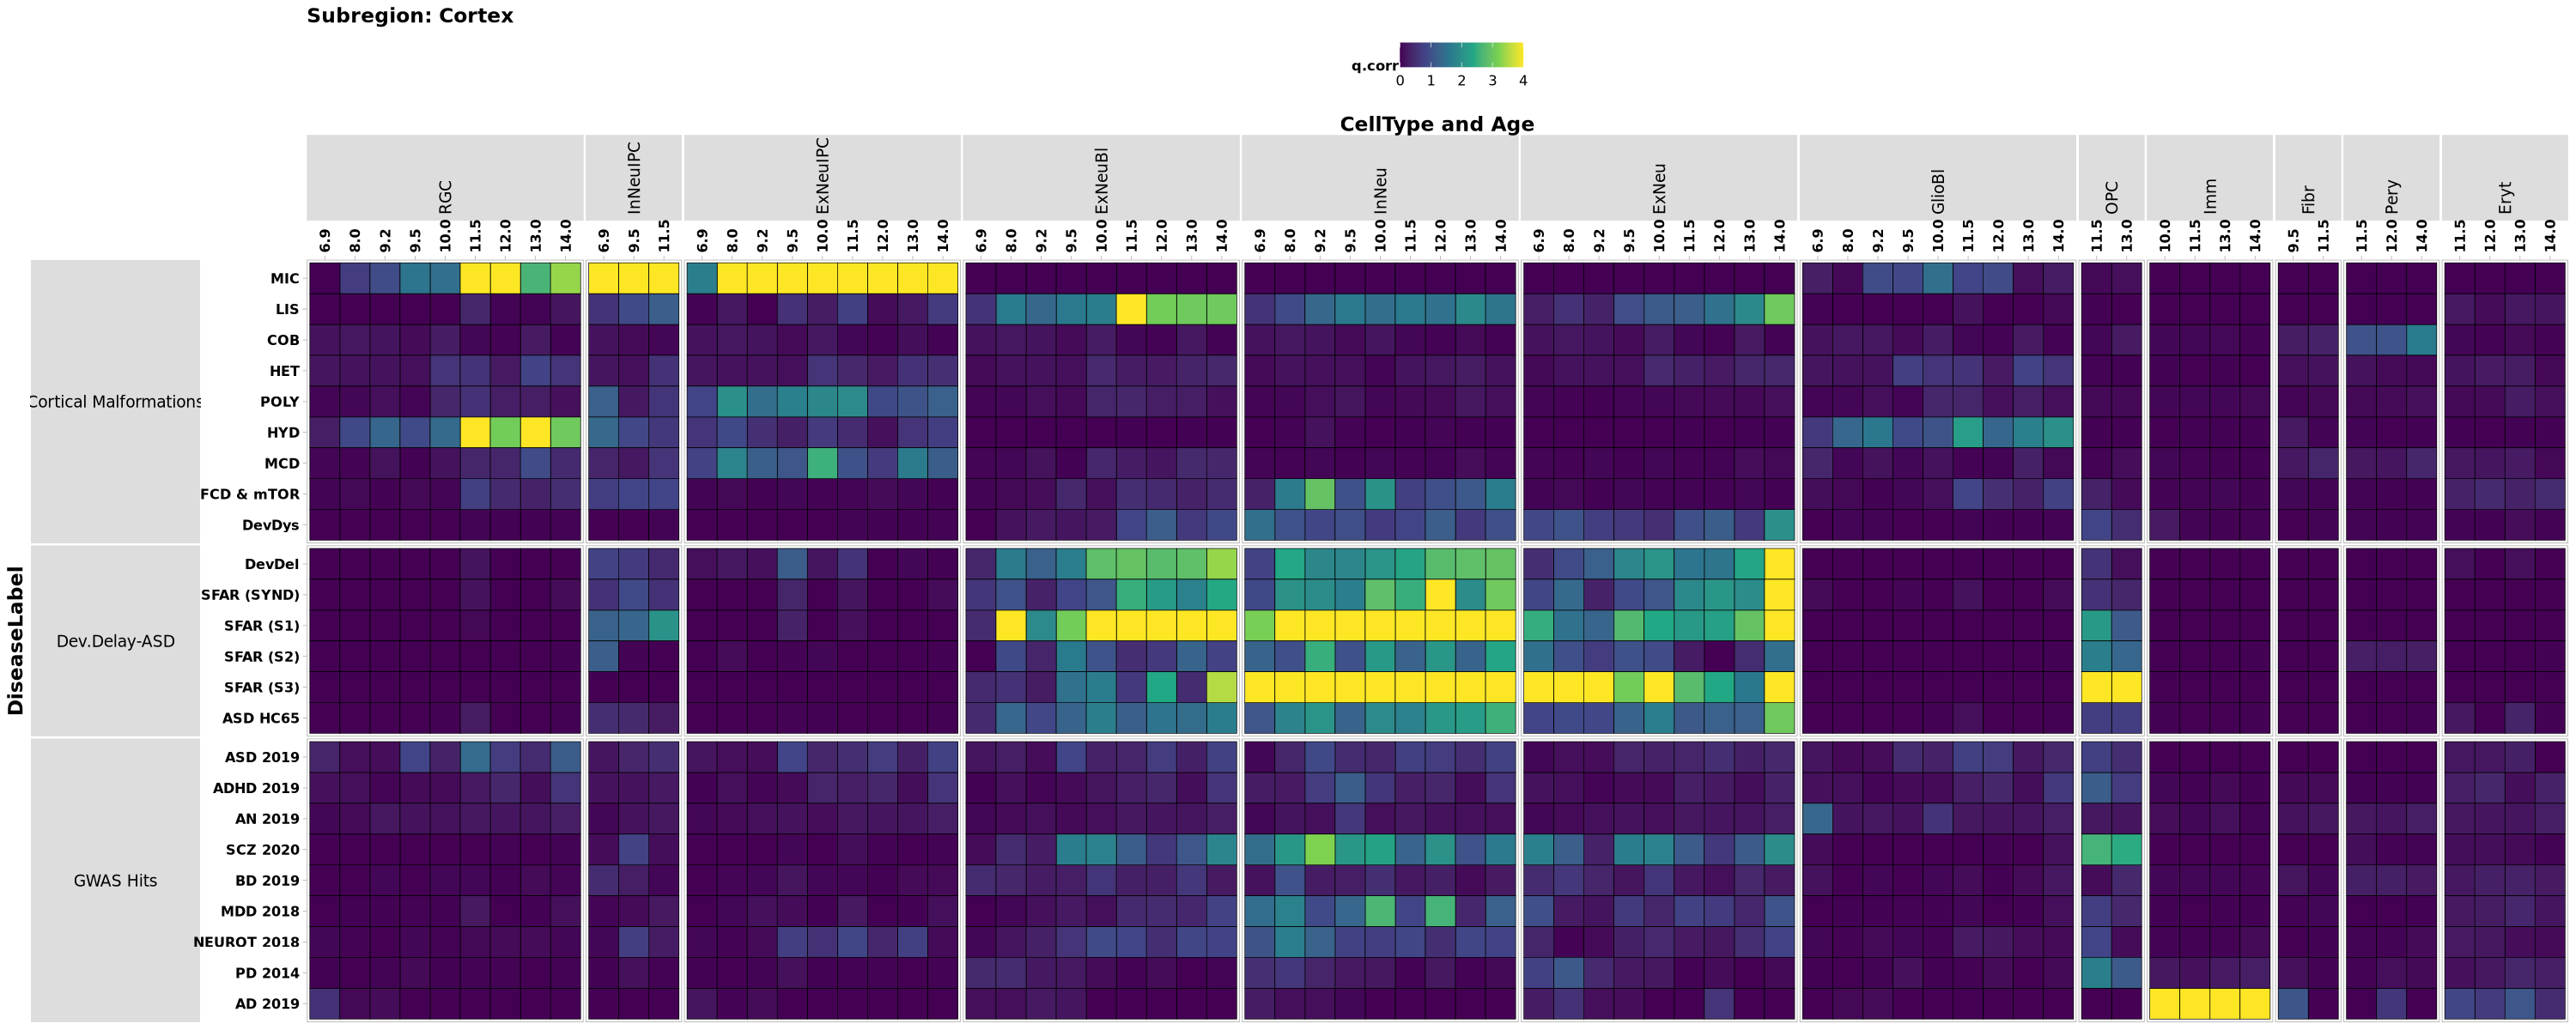

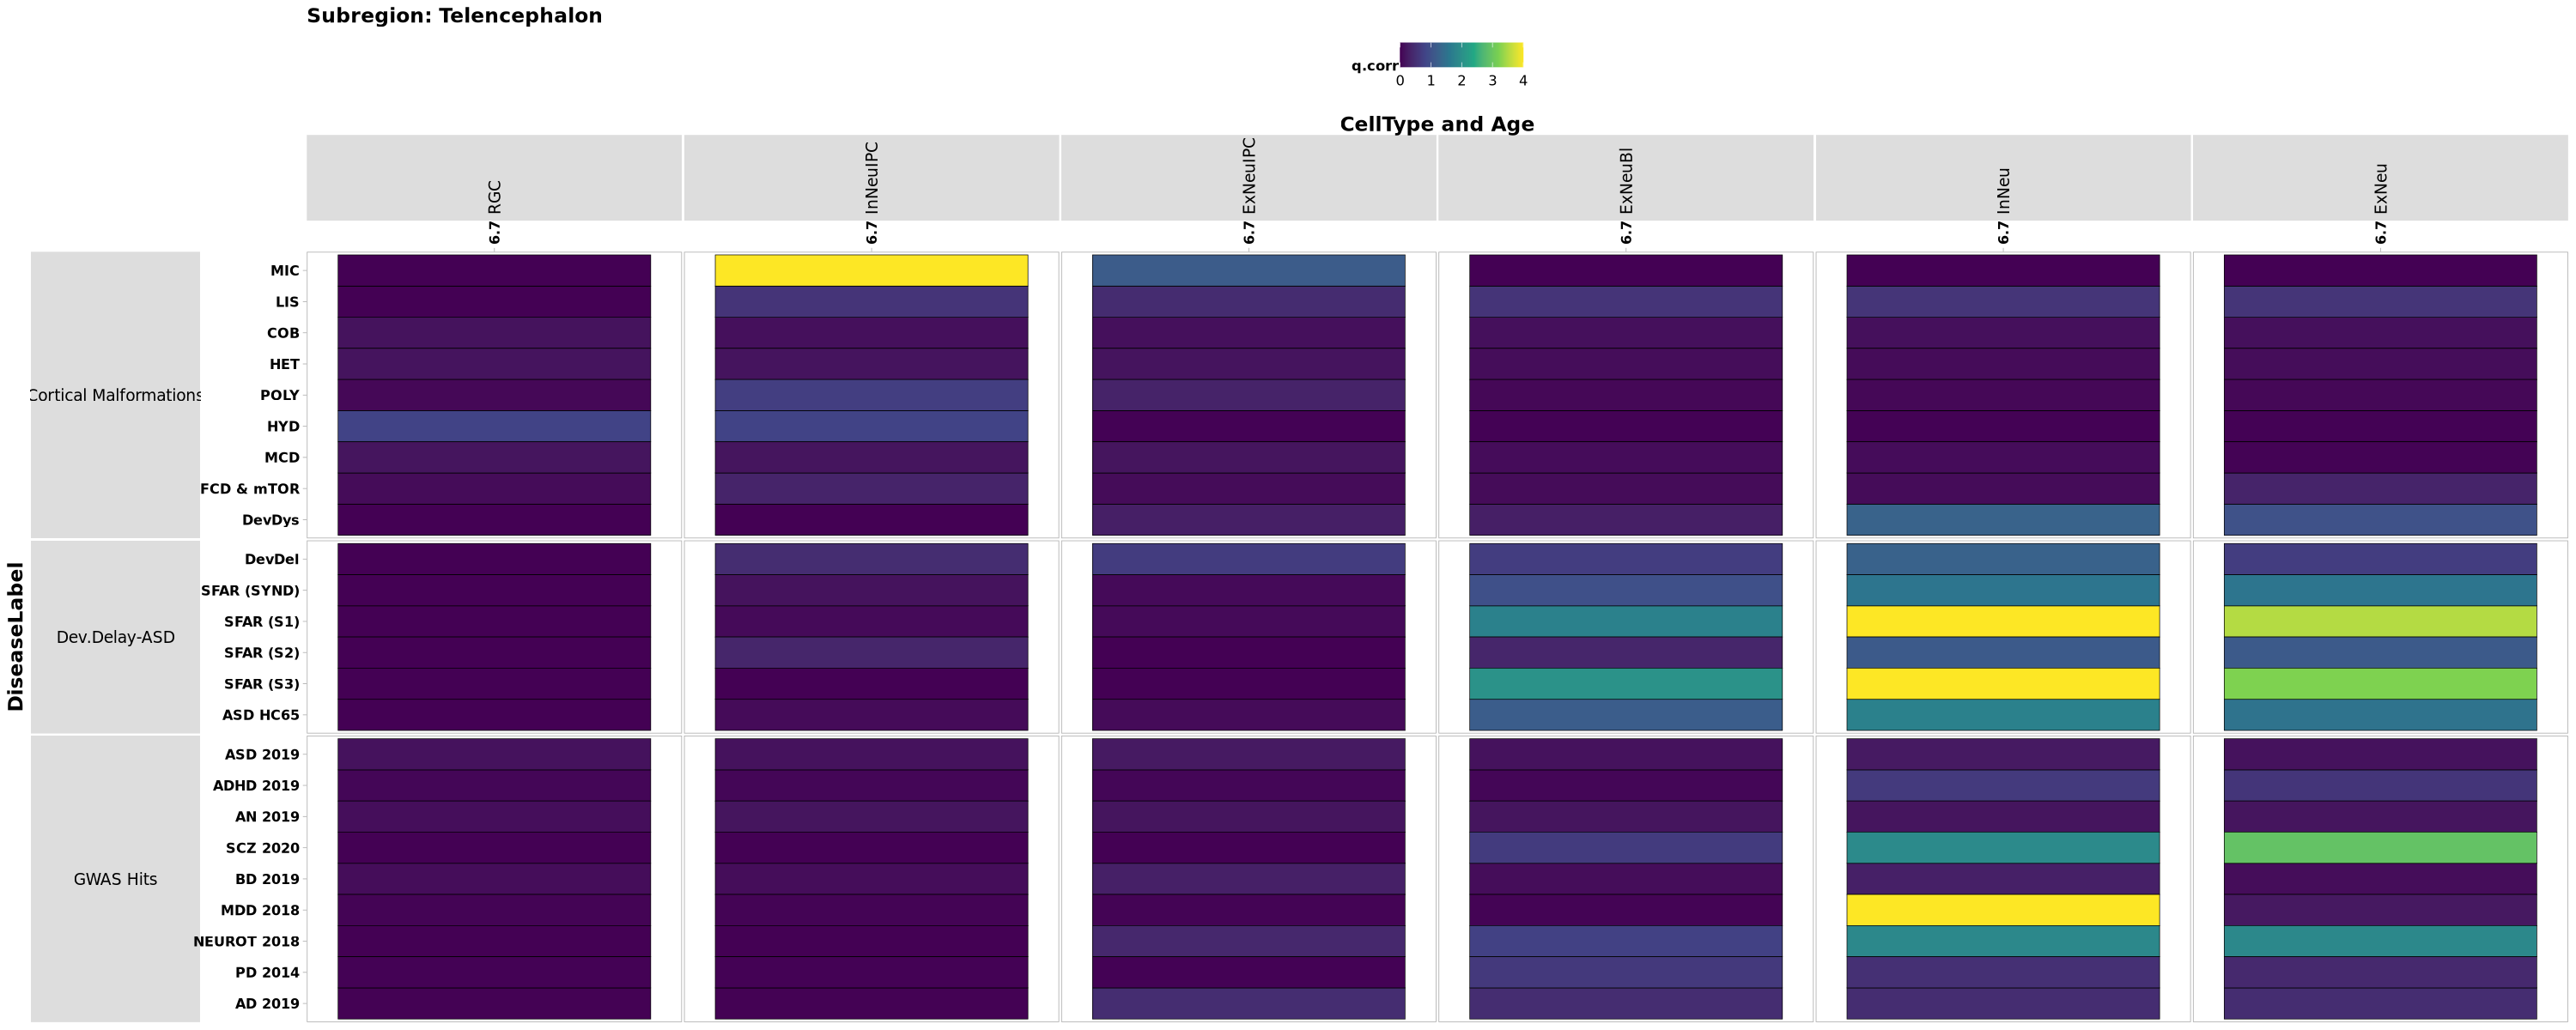

In [73]:
fig(25,10)
Heatmaps(res.df, 
        x.var = 'Age', col.facet.var = 'CellType', 
        mask.sign = F, 
        # na.value = 'transparent',
        list.var = 'DiseaseLabel', list.facet.var = 'DiseaseGroup', split.var = 'Subregion') 


# **Part 6: _`S E L E C T I O N`_**

In [74]:
subregions

[1] "Head"          "Brain"         "Striatum"      "Hippocampus"  
[5] "Forebrain"     "Subcortex"     "Cortex"        "Telencephalon"

In [75]:
subregions.manhattan <- c('Forebrain', 'Cortex')

data.manhattan <- subset(res.df, Subregion %in% subregions.manhattan)

In [ ]:
# First, Manhattan of all cell types, regions, ages...
fig(15,8)
Manhattan(data.manhattan, 
          list.var = 'DiseaseLabel', list.facet.var = 'DiseaseGroup', 
          color.var = 'CellTypeGroup', palette = cts.pal, 
          shape.var = 'Subregion', shapes = c('Forebrain' = 17, 'Cortex' = 19)
         ) -> p1

cairo_pdf(glue('{out.dir}/MF1.EWCE.results.Manhattan.pdf'), width = 15, height = 8)
# p1: Manhattan plot for selected subregions ('Forebrain', 'Cortex')
plot(p1)
dev.off()

pdf 
  2

In [80]:
subregions.heatmap <- c('Forebrain', 'Cortex', 'Striatum', 'Telencephalon')

data.heatmap <- subset(res.df, Subregion %in% subregions.heatmap)

In [ ]:
fig(30,8)
# Second, Heatmap of all cell types, regions, ages...

# p1: Heatmap of -log10(q.corr), no masking
p1 <- Heatmap(data.heatmap, 
              x.var = 'Age', col.facet.var = 'CellType', 
              mask.sign = F, 
              # na.value = 'transparent',
              list.var = 'DiseaseLabel', list.facet.var = 'DiseaseGroup')

# p2: Heatmap of -log10(q.corr), with masking
p2 <- Heatmap(data.heatmap, 
              x.var = 'Age', col.facet.var = 'CellType', 
              mask.sign = T, 
              # na.value = 'transparent',
              list.var = 'DiseaseLabel', list.facet.var = 'DiseaseGroup')

# p3: Heatmap of sd_from_mean, no masking
p3 <- Heatmap(data.heatmap, fill.var = 'sd_from_mean', fill.mlog10 = F, 
              fill.limits = c(NA,NA),
              x.var = 'Age', col.facet.var = 'CellType', 
              mask.sign = F, 
              # na.value = 'transparent',
              list.var = 'DiseaseLabel', list.facet.var = 'DiseaseGroup')

# p4: Heatmap of sd_from_mean, with masking
p4 <- Heatmap(data.heatmap, fill.var = 'sd_from_mean', fill.mlog10 = F, 
              fill.limits = c(NA,NA),
              x.var = 'Age', col.facet.var = 'CellType', 
              mask.sign = T, 
              # na.value = 'transparent',
              list.var = 'DiseaseLabel', list.facet.var = 'DiseaseGroup')

# refacet
p1 <- p1 + facet_nested(rows = vars(DiseaseGroup), cols = vars(Subregion, CellType), scales = 'free', space = 'free', switch = 'y')
p2 <- p2 + facet_nested(rows = vars(DiseaseGroup), cols = vars(Subregion, CellType), scales = 'free', space = 'free', switch = 'y')
p3 <- p3 + facet_nested(rows = vars(DiseaseGroup), cols = vars(Subregion, CellType), scales = 'free', space = 'free', switch = 'y')
p4 <- p4 + facet_nested(rows = vars(DiseaseGroup), cols = vars(Subregion, CellType), scales = 'free', space = 'free', switch = 'y')

# recolor
pal <- wesanderson::wes_palette("Zissou1", 100, type = "continuous")
scale_limits <- (res.df$sd_from_mean %>% range %>% abs %>% max %>% rep(length.out = 2) ) * c(-1,1)
p3 <- p3 + scale_fill_gradientn(colours = pal, limits = scale_limits, na.value = '#BBBBBB')
p4 <- p4 + scale_fill_gradientn(colours = pal, limits = scale_limits, na.value = '#BBBBBB')


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


In [ ]:
cairo_pdf(glue('{out.dir}/SF1.EWCE.results.Heatmaps.pdf'), width = 30, height = 8, onefile = T)
# p1: Heatmap of -log10(q.corr), no masking
plot(p1)
# p2: Heatmap of -log10(q.corr), with masking
plot(p2)
# p3: Heatmap of sd_from_mean, no masking
plot(p3)
# p4: Heatmap of sd_from_mean, with masking
plot(p4)
dev.off()

pdf 
  2

# **Part 7: _`E X T R A`_** Barplot of cell type proportions

In [ ]:
# load cell metadata - path relative to in.dir defined in Cell 2
cell_info_path <- file.path(in.dir, 'CellInfo.annotated.csv')
Cinfo <- data.table::fread(cell_info_path, nThread = parallel::detectCores(), data.table = F)[,-1] %>% 
    # subset(Region %in% c('Brain', 'Forebrain', 'Head', 'Telencephalon'))
    subset((Region %in% c('Forebrain', 'Telencephalon')) & (Subregion %in% c('Forebrain', 'Striatum', 'Cortex', 'Telencephalon')))

CellClasses <- c(
    'Placodes',
    'Neural crest',
    'Radial glia',
    'Neuronal IPC',
    'Neuroblast',
    'Neuron',
    'Glioblast',
    'Oligo',
    'Immune',
    'Fibroblast',
    'Erythrocyte',
    'Vascular'
)


Cinfo$Age <- factor(as.character(Cinfo$Age), levels = as.character(sort(unique(as.numeric(as.character(Cinfo$Age))))))
Cinfo$Subregion <- factor(as.character(Cinfo$Subregion), levels = subregions)
Cinfo$CellClass <- factor(as.character(Cinfo$CellClass), levels = rev(CellClasses))

In [37]:
Cinfo[,c('Region','Subregion')] %>% table %>% {. >0}

Subregion
Region          Head  Brain Striatum Hippocampus Forebrain Subcortex Cortex
  Forebrain     FALSE FALSE FALSE    FALSE        TRUE     FALSE     FALSE 
  Telencephalon FALSE FALSE  TRUE    FALSE       FALSE     FALSE      TRUE 
               Subregion
Region          Telencephalon
  Forebrain     FALSE        
  Telencephalon  TRUE

In [ ]:
lapply(split(Cinfo, Cinfo$Subregion),function(x){
    y <- table(unique(x[,c('Age', 'SampleID')])) %>% rowSums
    y[y > 1]
}) %>% unlist

Striatum.6.9   Striatum.14   Forebrain.5 Forebrain.5.5 Forebrain.6.6 
           14             4             4             2             4 
Forebrain.7.5 Forebrain.8.5 Forebrain.9.2  Forebrain.10    Cortex.6.9 
            4             8             4             8             8 
     Cortex.8    Cortex.9.2    Cortex.9.5     Cortex.10   Cortex.11.5 
            2             4             2             8            11 
    Cortex.12     Cortex.13     Cortex.14 
            6             6             5

In [ ]:
fig(20,7)
# p.ndonors: Bar plot showing number of cells per donor across Age and Subregion
p.ndonors <- ggplot(Cinfo, aes(x = Age, fill = SampleID)) + 
    geom_bar(color = 'black') + 
    facet_grid(cols = vars(Subregion), scales ='free', space = 'free') + 
    theme(legend.position = 'none') + 
    ggtitle('N donors per timepoint and region', subtitle = 'Each colored block represents the number of cells from a given donor')

In [ ]:
pal <- c(
    '#C1F334FF', '#EA4F0DFF', '#4454C4FF', '#7A0403FF', '#29EFA2FF', '#BE2102FF', '#F1CA3AFF', '#30123BFF', '#7DFF56FF', '#4490FEFF', '#FE922AFF', '#1FC8DEFF'
)
              
fig(13,8)
# p: Horizontal bar plot of cell class proportions by Age, faceted by Subregion
ggplot(Cinfo, aes(x = Age, fill = CellClass)) + 
    facet_grid(cols = vars(Subregion), scales = 'free', space = 'free') + 
    geom_bar(position = 'fill', color = 'black', linewidth = 0.1) + 
    scale_fill_manual(values = pal) +
    theme_light() +
    ggpubr::labs_pubr() +
    labs(x = 'Subregion and Age', y = 'Fraction of cells', fill='Cell class') +
    scale_y_continuous(labels = scales::label_percent(), expand = expansion(mult = c(0,0))) + 
    scale_x_discrete(position = 'top', expand = expansion(mult = c(0,0))) + 
    theme(
        axis.text.x.top = element_text(angle = 90, hjust = 0, vjust=0.5), 
        strip.placement = 'outside',
        strip.text = element_text(color = 'black', angle = 90, hjust = 0, vjust=0.5),
        strip.background = element_rect(fill='#DDDDDD', color = 'transparent'),
        legend.position = 'left',  
        panel.grid.major = element_blank(), 
        panel.spacing.x = unit(3, 'mm')) -> p




cairo_pdf(glue('{out.dir}/SF1.EWCE.Fraction_of_cells.Horizontal.FT_FCST.pdf'), width = 13, height = 8, onefile = T)
# p: Horizontal cell fraction plot
p
# p.ndonors: Donor contribution plot
p.ndonors
dev.off()


fig(10,10)
# p: Vertical bar plot of cell class proportions by Age, faceted by Subregion
ggplot(Cinfo, aes(y = forcats::fct_rev(Age), fill = CellClass)) + 
    facet_grid(rows = vars(Subregion), scales = 'free', space = 'free', switch = 'y') + 
    geom_bar(position = 'fill', color = 'black', linewidth = 0.1) + 
    scale_fill_manual(values = pal) +
    theme_light() +
    ggpubr::labs_pubr() +
    labs(y = 'Subregion and Age', x = 'Fraction of cells', fill='Cell class') +
    scale_x_continuous(position = 'top', labels = scales::label_percent(), expand = expansion(mult = c(0,0))) + 
    scale_y_discrete(expand = expansion(mult = c(0,0))) + 
    theme(
        axis.text.x.top = element_text(angle = 90, hjust = 0, vjust=0.5), 
        strip.placement = 'outside',
        strip.text.y.left = element_text(color = 'black', angle = 0, hjust = 0.5, vjust=0.5),
        strip.background = element_rect(fill='#DDDDDD', color = 'transparent'),
        legend.position = 'right',  
        panel.grid.major = element_blank(), 
        panel.spacing.y = unit(3, 'mm')) -> p




cairo_pdf(glue('{out.dir}/SF1.EWCE.Fraction_of_cells.Vertical.FT_FCST.pdf'), width = 10, height = 10, onefile = T)
# p: Vertical cell fraction plot
p
# p.ndonors: Donor contribution plot
p.ndonors
dev.off()

pdf 
  2

pdf 
  2

In [52]:
table(Cinfo$ShortName)
table(Cinfo$discarded)


             COPs     Endo     Eryt    ExNeu  ExNeuBl ExNeuIPC     Fibr 
    1610      143      527     2031   118627    85323    38655     6658 
  GlioBl      Imm    InNeu  InNeuBl InNeuIPC      OPC     Pery     Plac 
   42780     1589    72430     1087    11376      750     1231        1 
     RGC  Schwann     VSMC 
  193379       84       85 


 FALSE   TRUE 
576756   1610 